# Random Forests:

- ability to greatly increase the performance based on expanding ideas from the Decision Tree.
- known as Ensemble learners since they rely on an ensemble of models/multiple decision trees. 

### Motivation behind RFs: 

- Decision Tree restricted by Gini Impurity and single DT always has same root node and so DT will always be the same and thus limited. 
- Potential to overfit to data
- Splitting Criteria can lead to some features never being used. 
- RF : create subsets of randomly selected n features at each potential split 

- each tree 'votes' on y label and label with most 'votes' is selected. (we know probability of being correct)
- can average out predictive continous output.

### Sklearns Random Forest class call and its hyperparameters:

#### 1. n_estimators:
    - the more DTs we have the more oppurtunity to learn from a variety of feature subset combinations
    - n_of trees:
        - n_estimators documentation suggests 64-128 trees, CV grid search of trees, plot error vs number of trees 
        (see elbow KNN method, will notice a diminishing error reduction after some N trees.
        - after a while, new trees will effectively be duplicates of eachother and so dont really cause much of an issue.
        - over fitting is thus of minimal concern
    - Default value is 100. Gridsearch for better parameter. 
       
#### 2. max_features
    - how many? publication says log(base2)(N+1) where N is total features.
    - number of features in subset? sqrt(N) or N/3 for regression tasks (larger than sqrt(N))
    - best practice to gridsearch from sqrt(N) and then adjust accordingly 

#### 3. bootstrap samples
    - in general terms: describes random sampling with replacement (random sampling where a feature can be selected more than once) 
    - help create more diverse trees that are less likely to be correlated with eachother.
    - two randomised training componenets: 1. subset of features used, 2. boostrap rows of data (randomises rows)
    - bootstrapping used to reduce correlation, helps model generalise better on data it hasnt seen before.
    
#### 4. oob_score (out of bag error)
    - bagging: what is it; 
        - if we performed bootstrapping when building out trees, this means that for certain trees, certain rows are not used for training - grab rows that were not used in order to calculate performance metric. OUT OF BAG ERROR.
        - in a sense an alt to using standard TTS methods
        - OOB true will not change the trees only bootstrap will. 
        - OOB error can only be calculated on trees which did not use the rows. - thus default is false.

### Coding CLASSIFICATION with random forest classifier:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATA\penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first = True)

In [7]:
y = df['species']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 
# not bothering with gridsearchcv as just coding to show how main code works

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc_model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [13]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [15]:
predictions = rfc_model.predict(X_test)

In [16]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


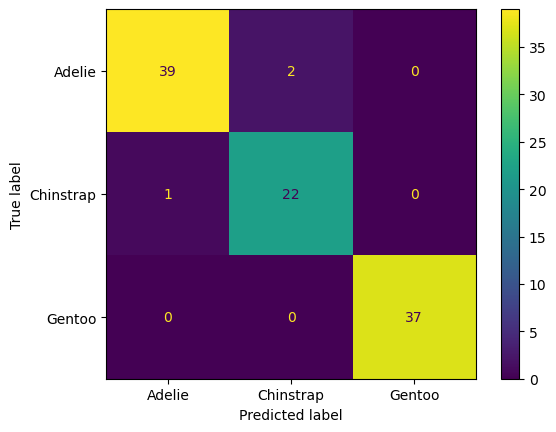

In [18]:
plot_confusion_matrix(rfc_model,X_test,y_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



### Coding CLASSIFICATION with random forest classifier (bigger dataset) with GridSearch :

In [20]:
df = pd.read_csv("DATA/data_banknote_authentication.csv")

In [21]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


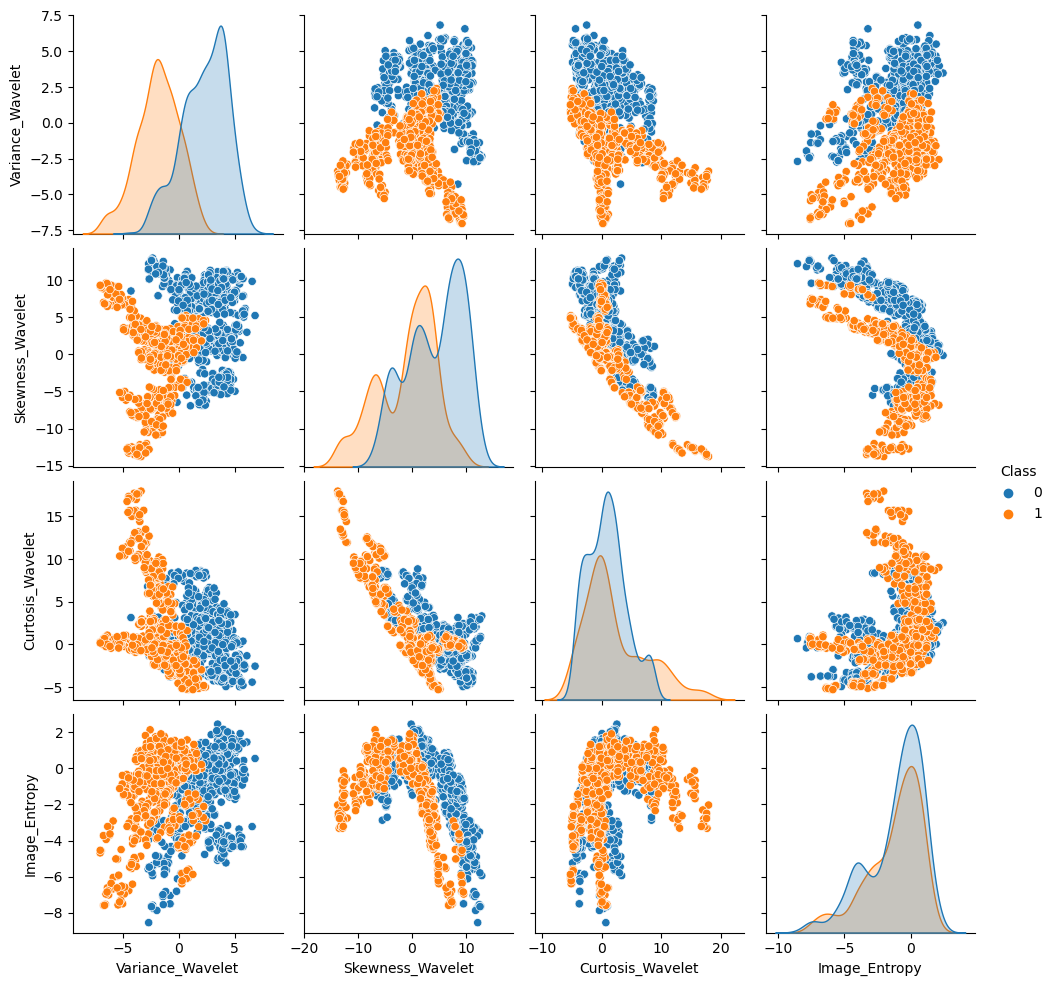

In [25]:
sns.pairplot(df,hue='Class')

In [26]:
X = df.drop('Class',axis=1)

In [27]:
y = df['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101) 

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False] #only possible when bootstrap is true. 

In [33]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [34]:
rfc = RandomForestClassifier()

In [36]:
grid = GridSearchCV(rfc,param_grid)

In [37]:
grid.fit(X_train,y_train)

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedW

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [38]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [39]:
rfc = RandomForestClassifier(max_features=2,n_estimators=100,oob_score=True)

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [41]:
rfc.oob_score_

0.9948542024013722

In [42]:
predictions = rfc.predict(X_test)

In [47]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



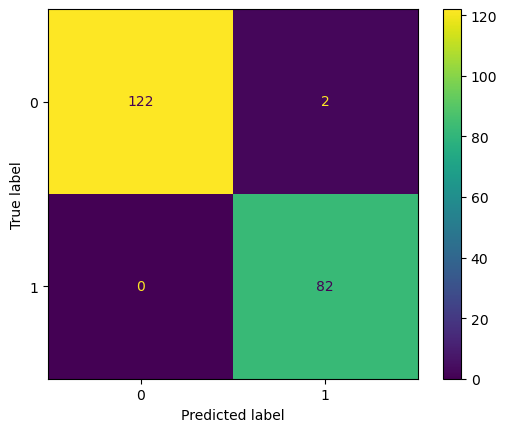

In [46]:
plot_confusion_matrix(rfc,X_test,y_test)

In [61]:
#plot error vs estimators

errors = []
misclassifications = []

for n in range (1,64):
    
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test) #misclassed
    
    errors.append(err)
    misclassifications.append(n_missed)
    

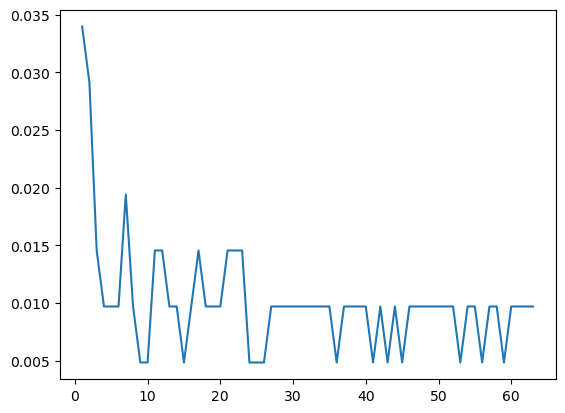

In [62]:
plt.plot(range(1,64),errors)

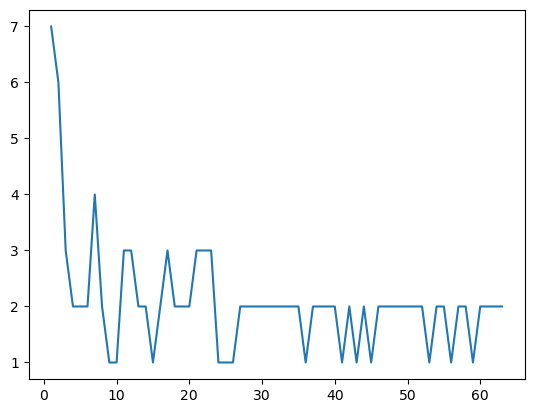

In [63]:
plt.plot(range(1,64),misclassifications)

## Random Forest Linear Regression model

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('DATA/rock_density_xray.csv')

In [67]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [68]:
df.columns = ['Signal','Density'] #rename column headings for simplicity (remember units)

In [69]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

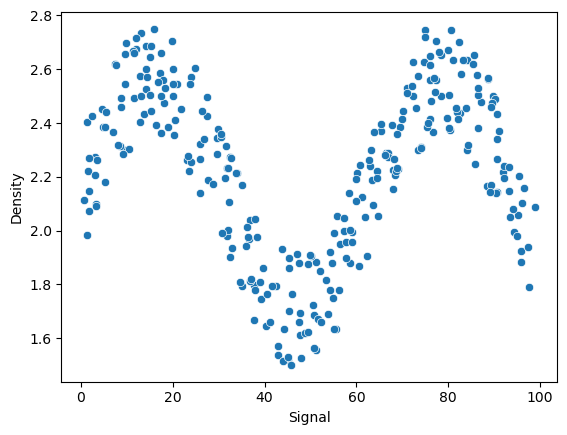

In [70]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [71]:
from sklearn.model_selection import train_test_split

In [79]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr_model = LinearRegression()

In [83]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [85]:
lr_preds = lr_model.predict(X_test)

In [86]:
lr_preds #singal seems to be reporting back an average of some sort

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [89]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

<AxesSubplot:xlabel='Signal', ylabel='Density'>

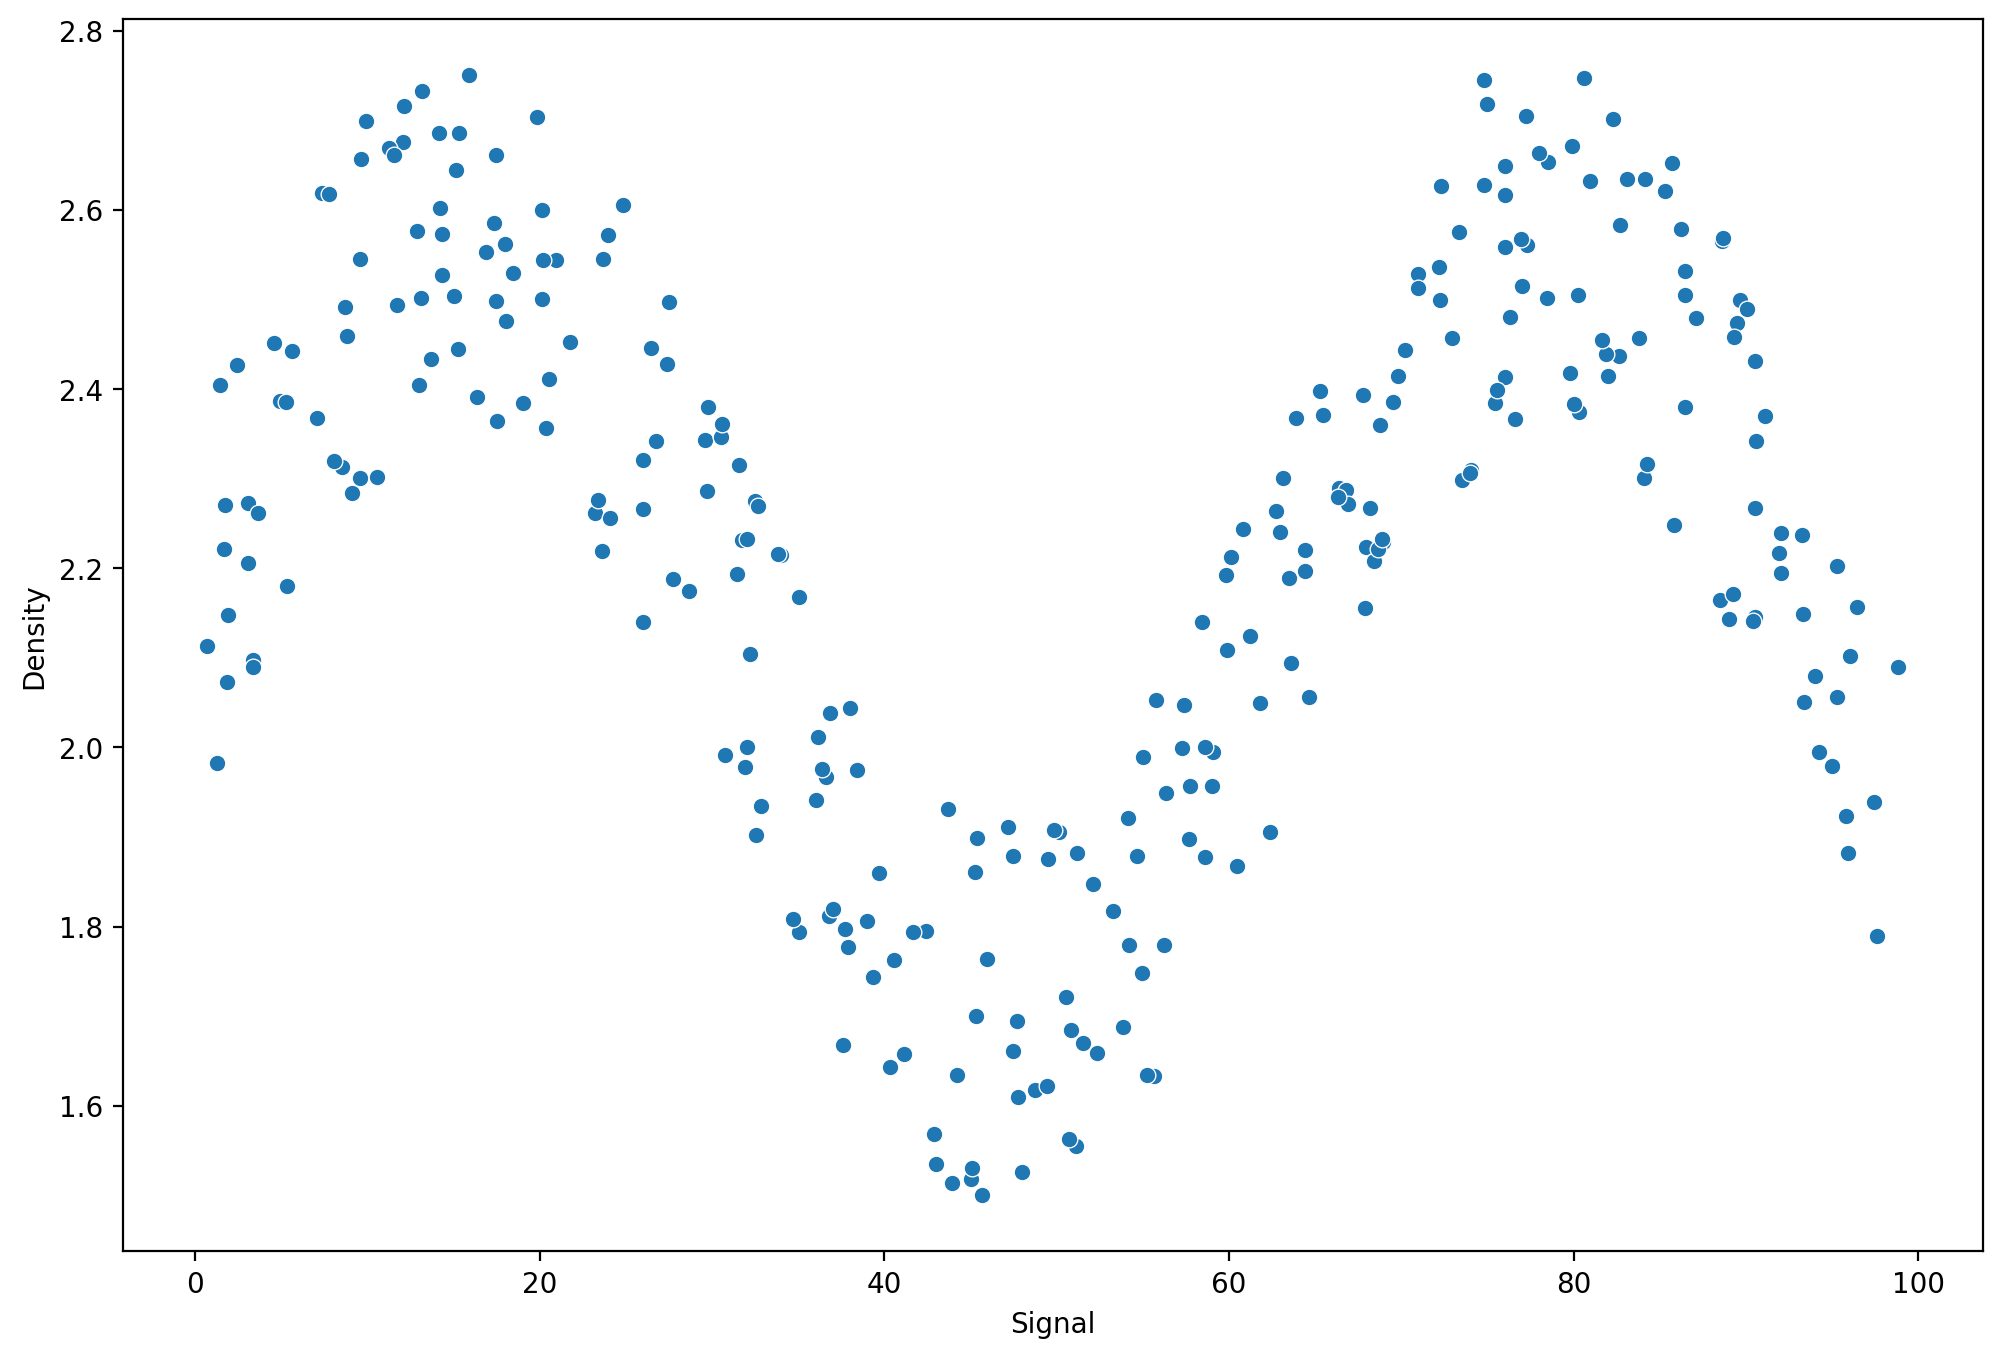

In [90]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

#problem with this plot.

In [93]:
signal_range = np.arange(0,100)

In [94]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [101]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

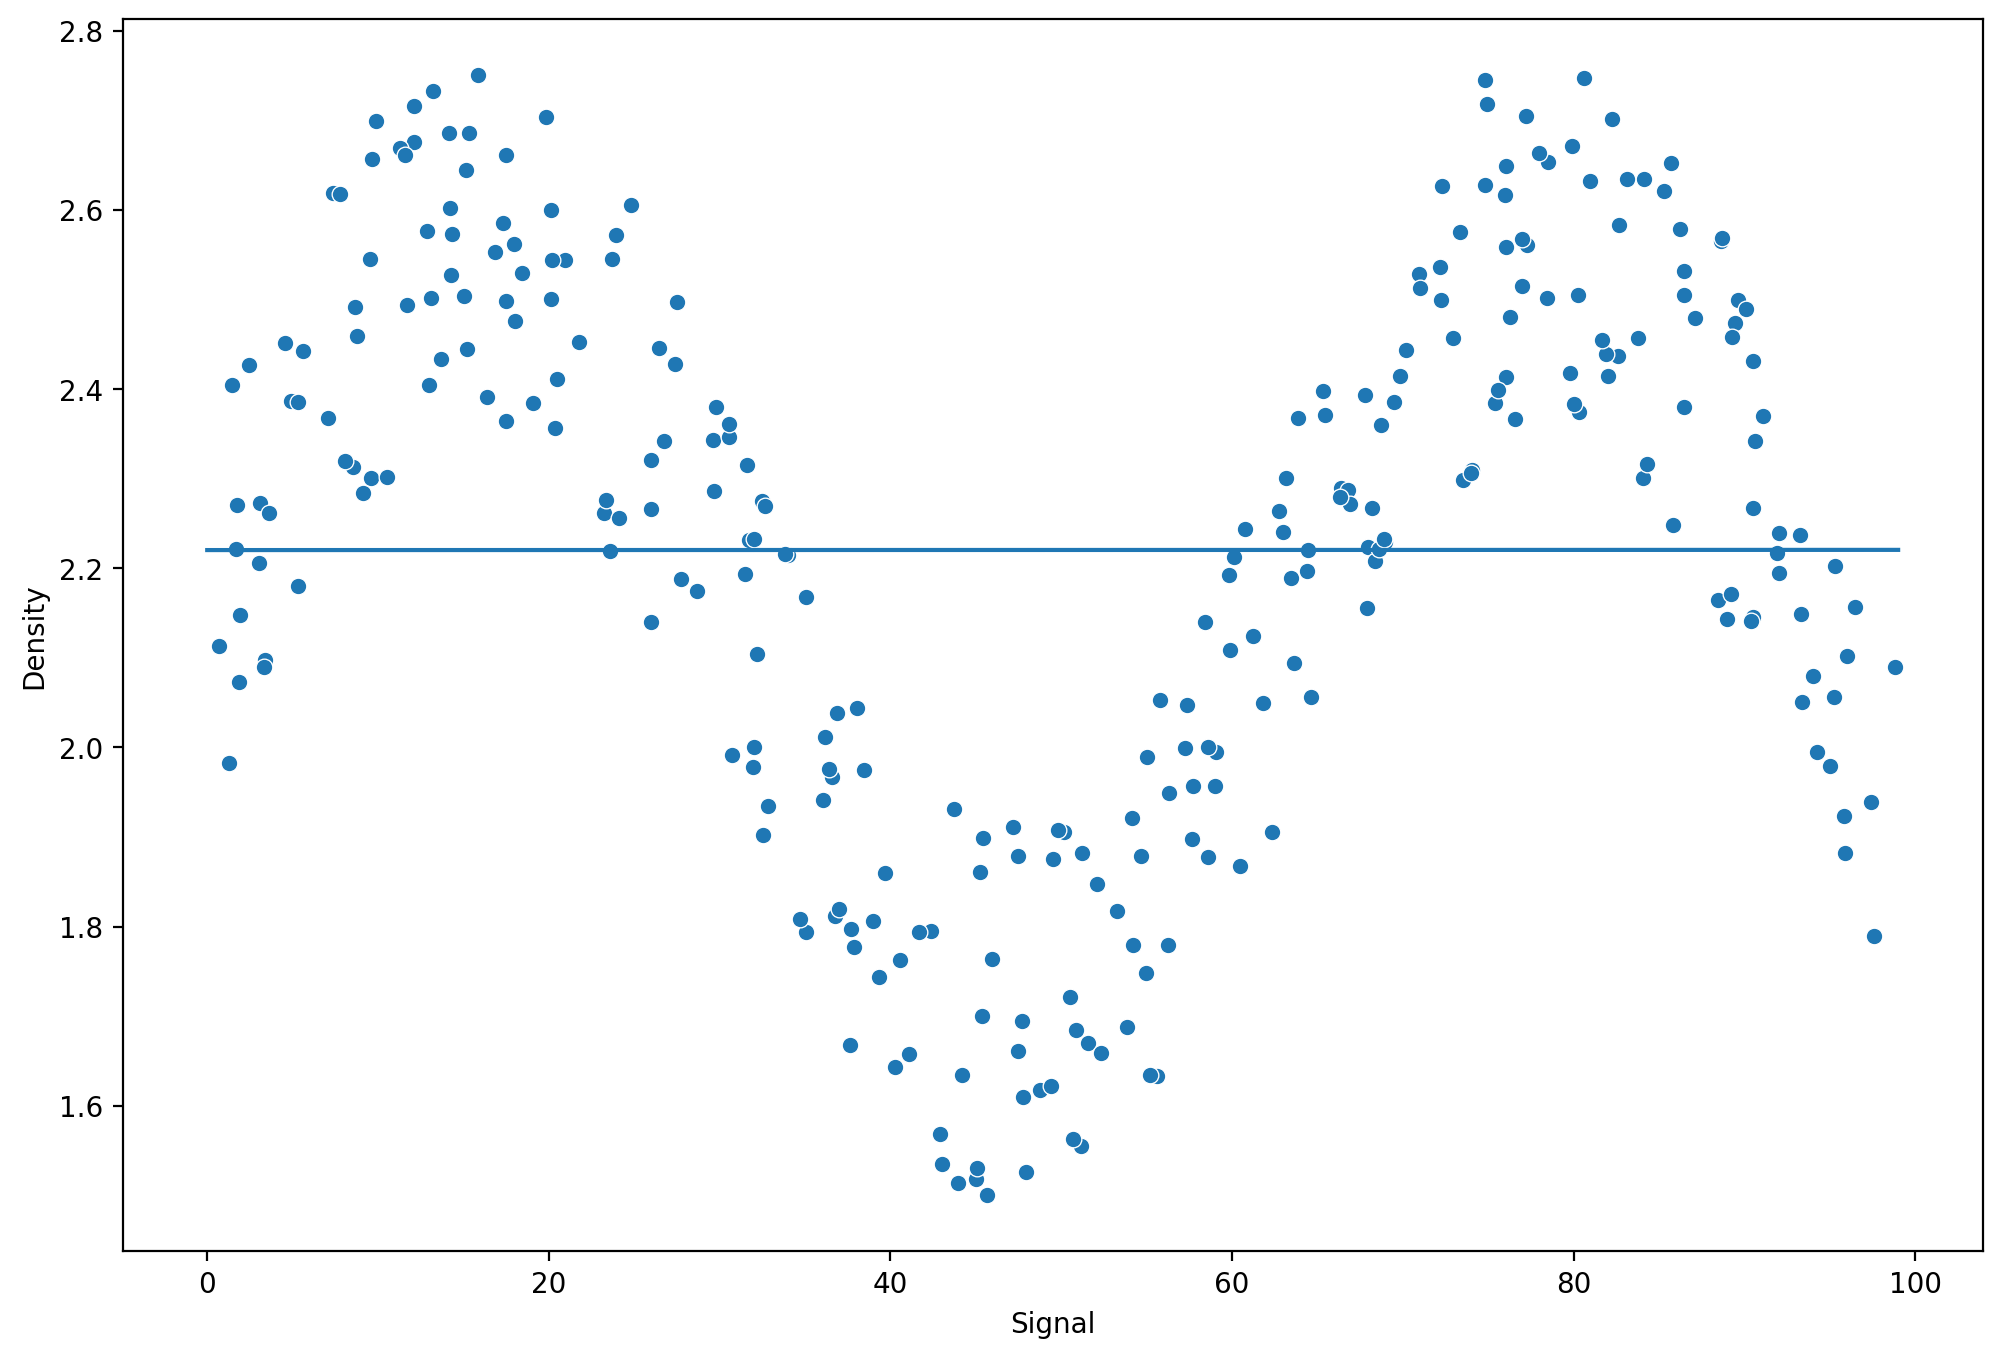

In [102]:

plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

#problem with this plot.
plt.plot(signal_range,signal_preds)
#model not predicting well, Linear model cannot fit to the data since data has this curvature characteristic.

## Random Forest Polynomial Regression model.

In [103]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit model
    model.fit(X_train,y_train)
    # metrics 
    preds= model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f"RMSE: {rmse}")
    mae = mean_absolute_error(y_test,preds)
    print(f"MAE: {mae}")
    
    #plot results on signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='red')

    plt.plot(signal_range,signal_preds)
    

RMSE: 0.2570051996584629
MAE: 0.211198973318633


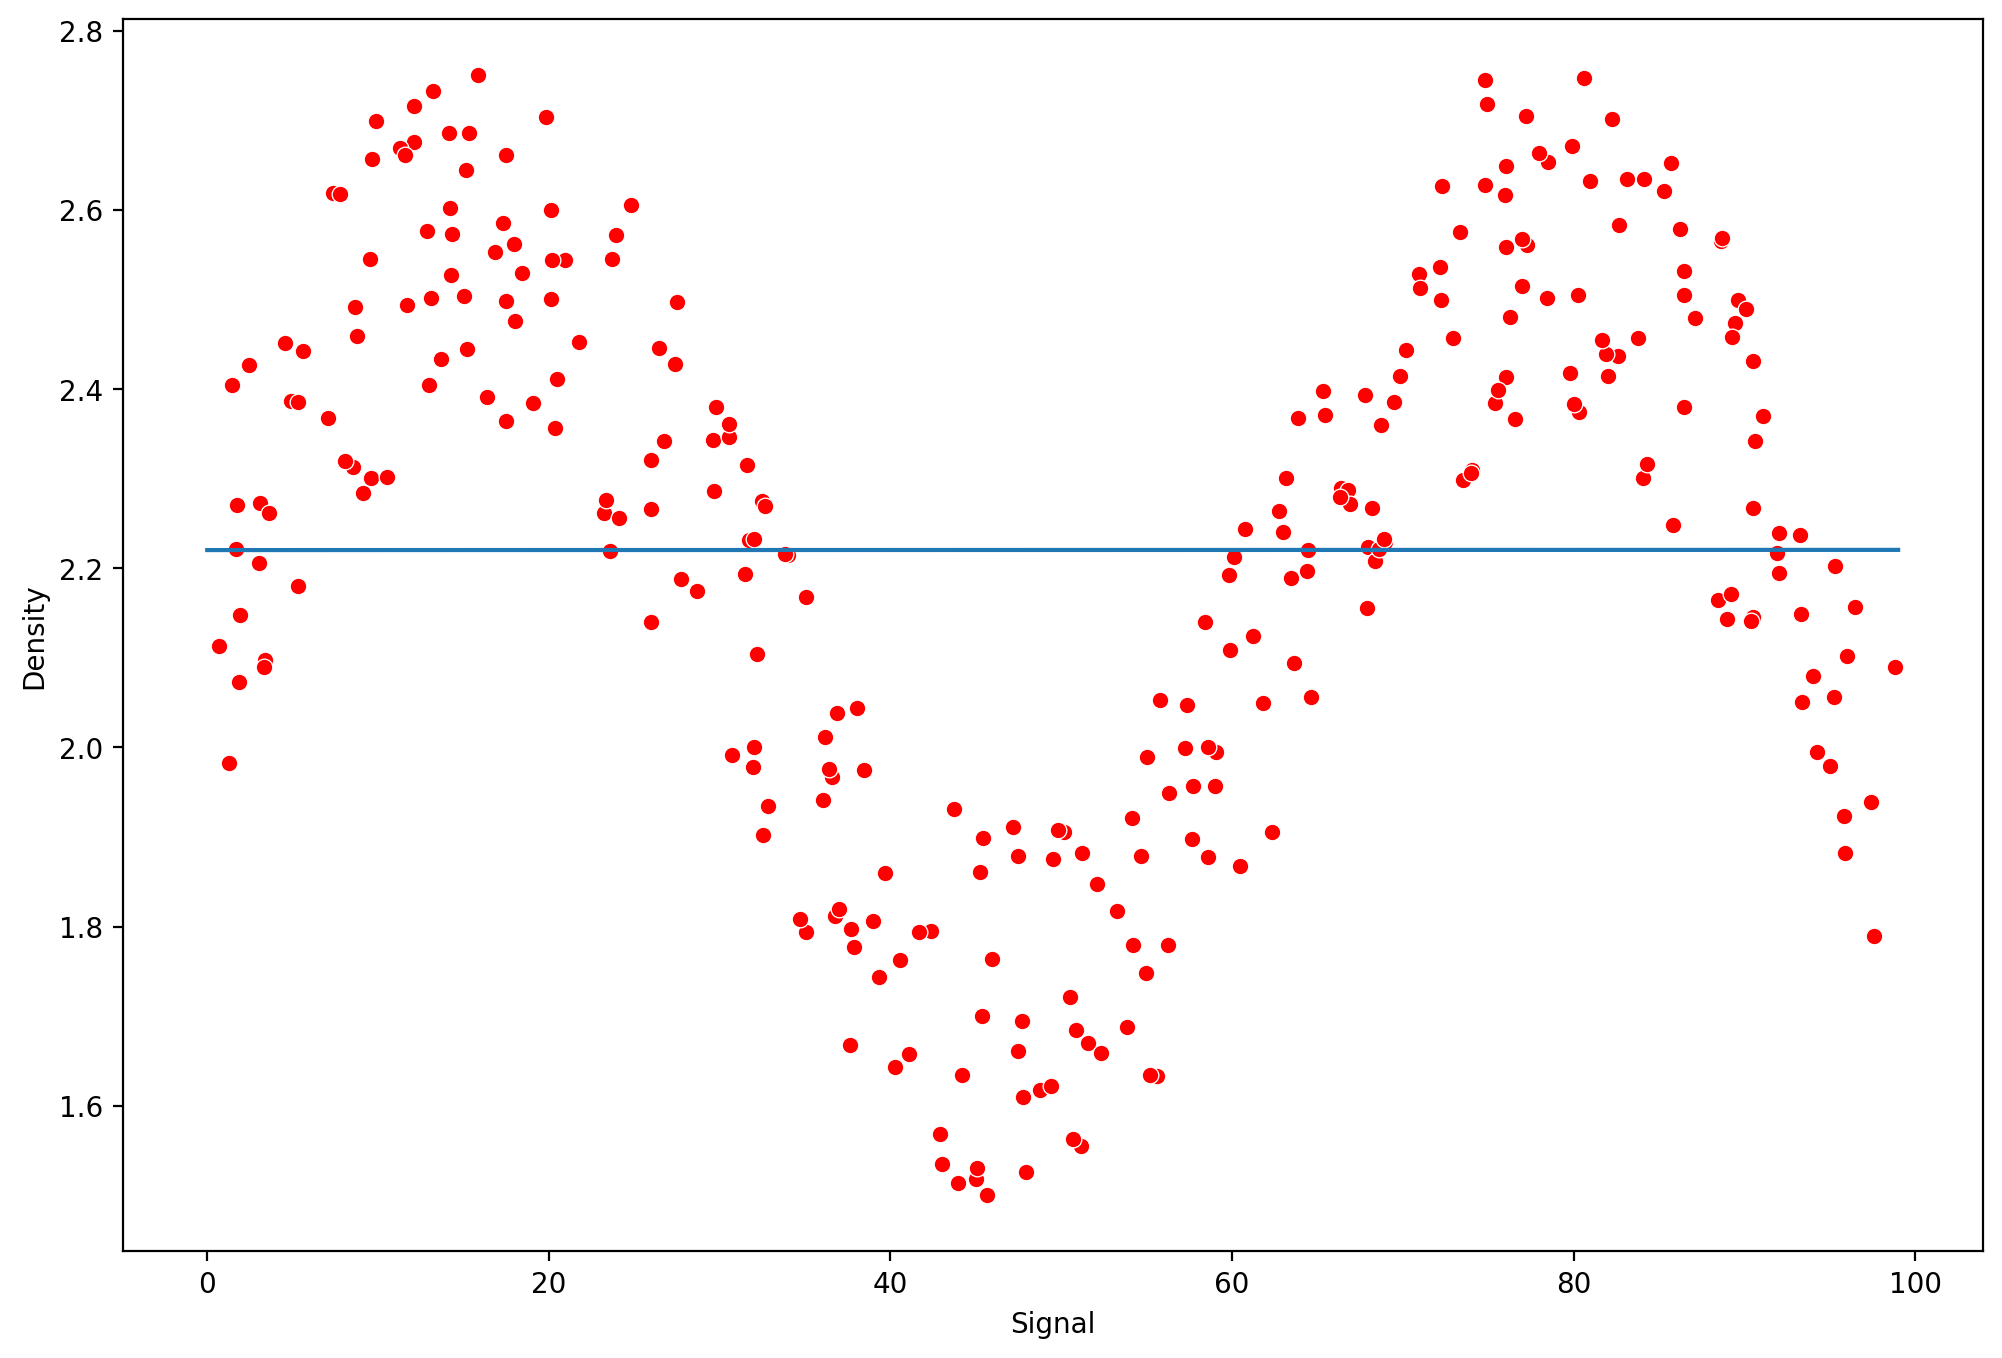

In [105]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [106]:
#pipeline for polynomial orders
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [107]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

RMSE: 0.2817309563725558
MAE: 0.22903105443511207


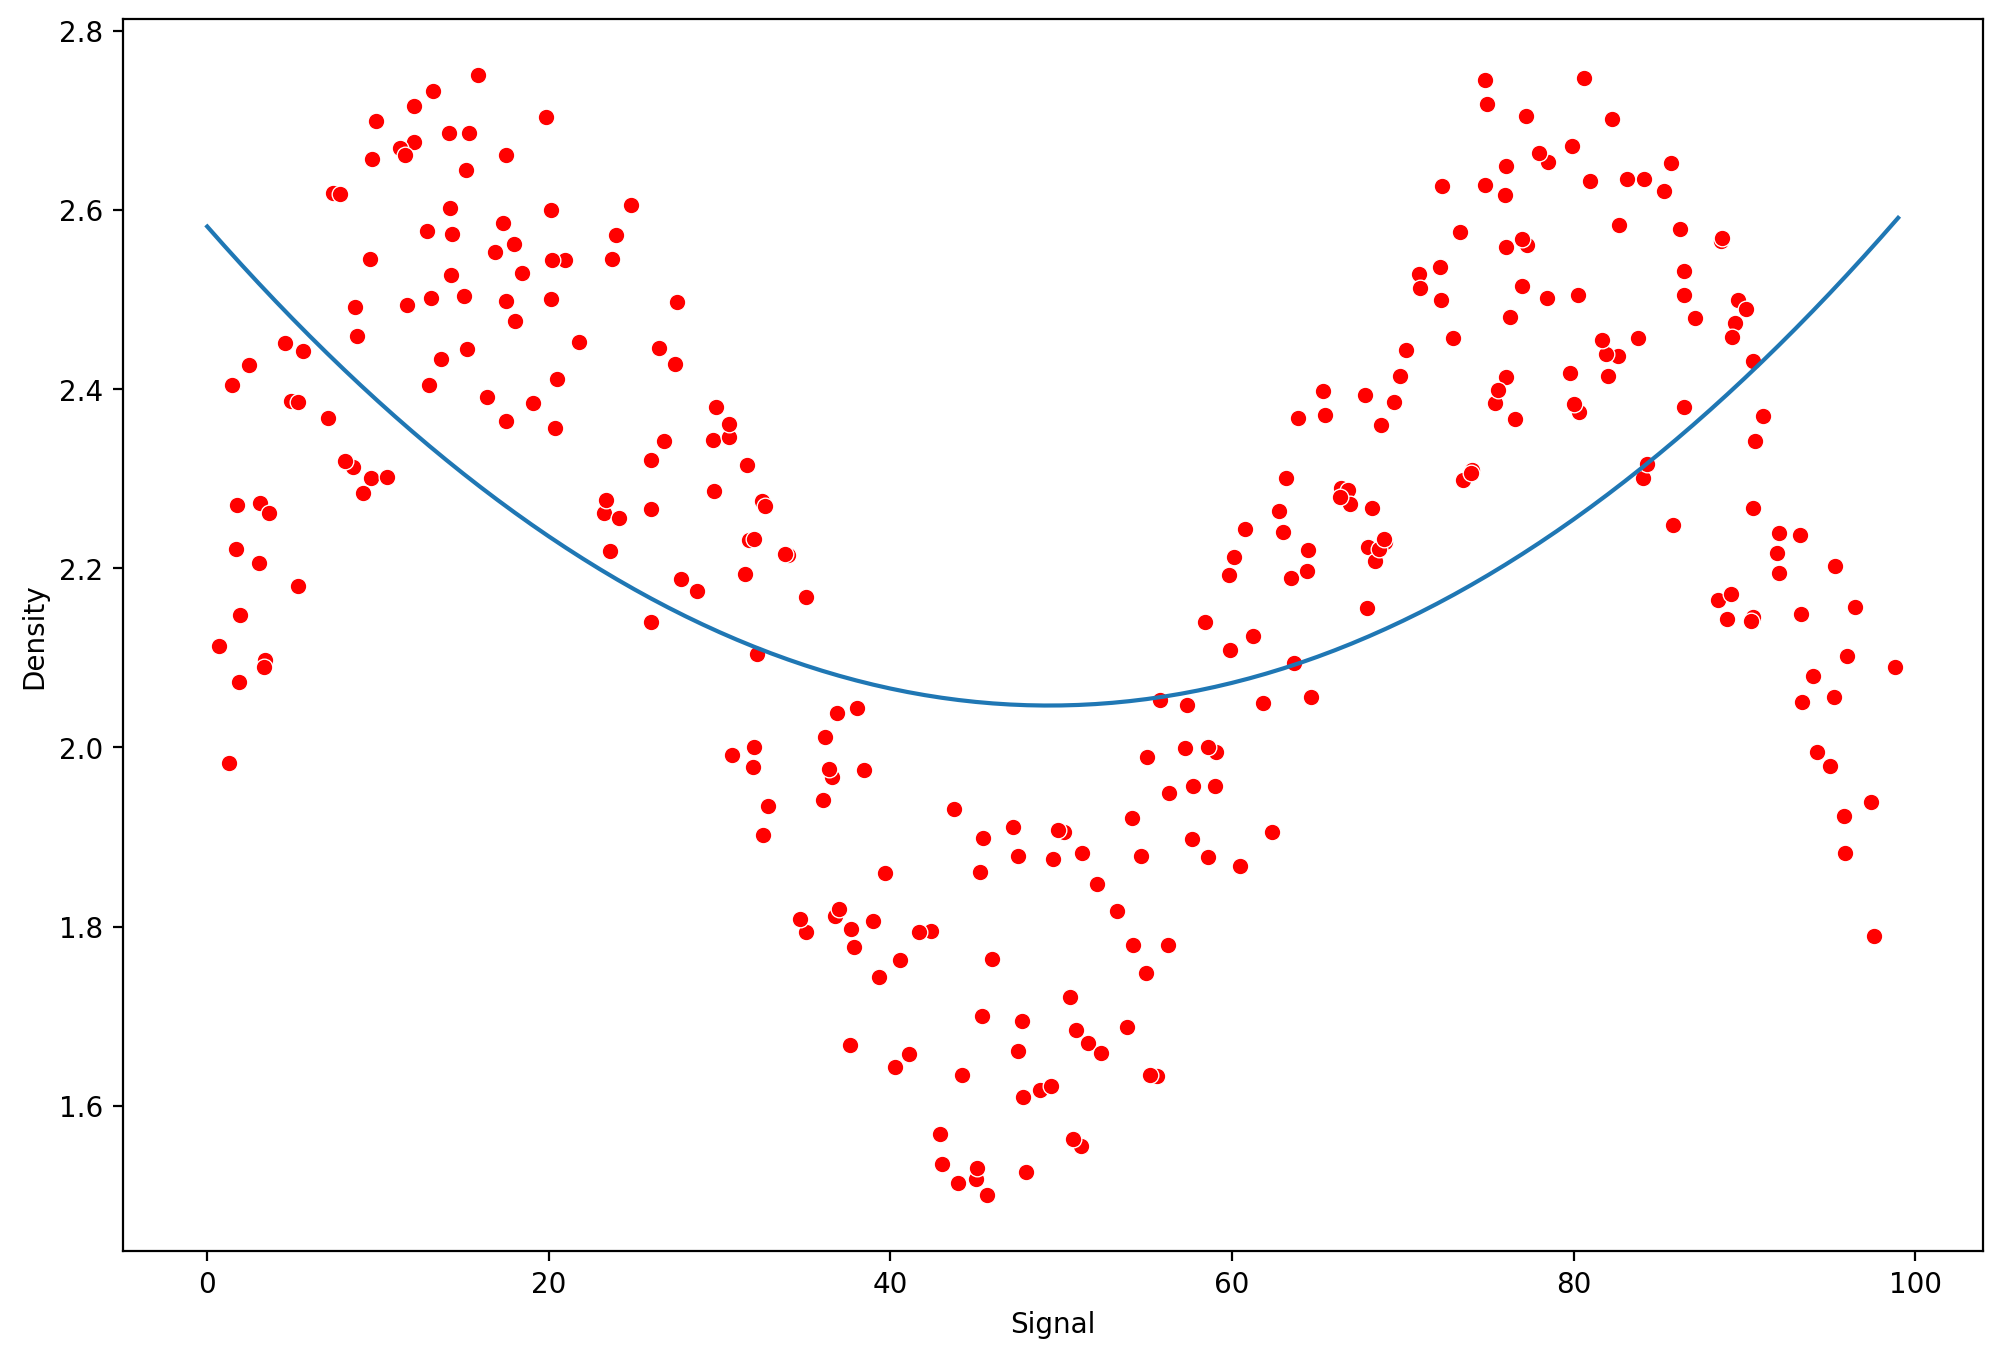

In [108]:
run_model(pipe,X_train,y_train,X_test,y_test) #creates polynomial feature set off X_train and trains it with linear regression

RMSE: 0.13616043988190635
MAE: 0.11881362200973404


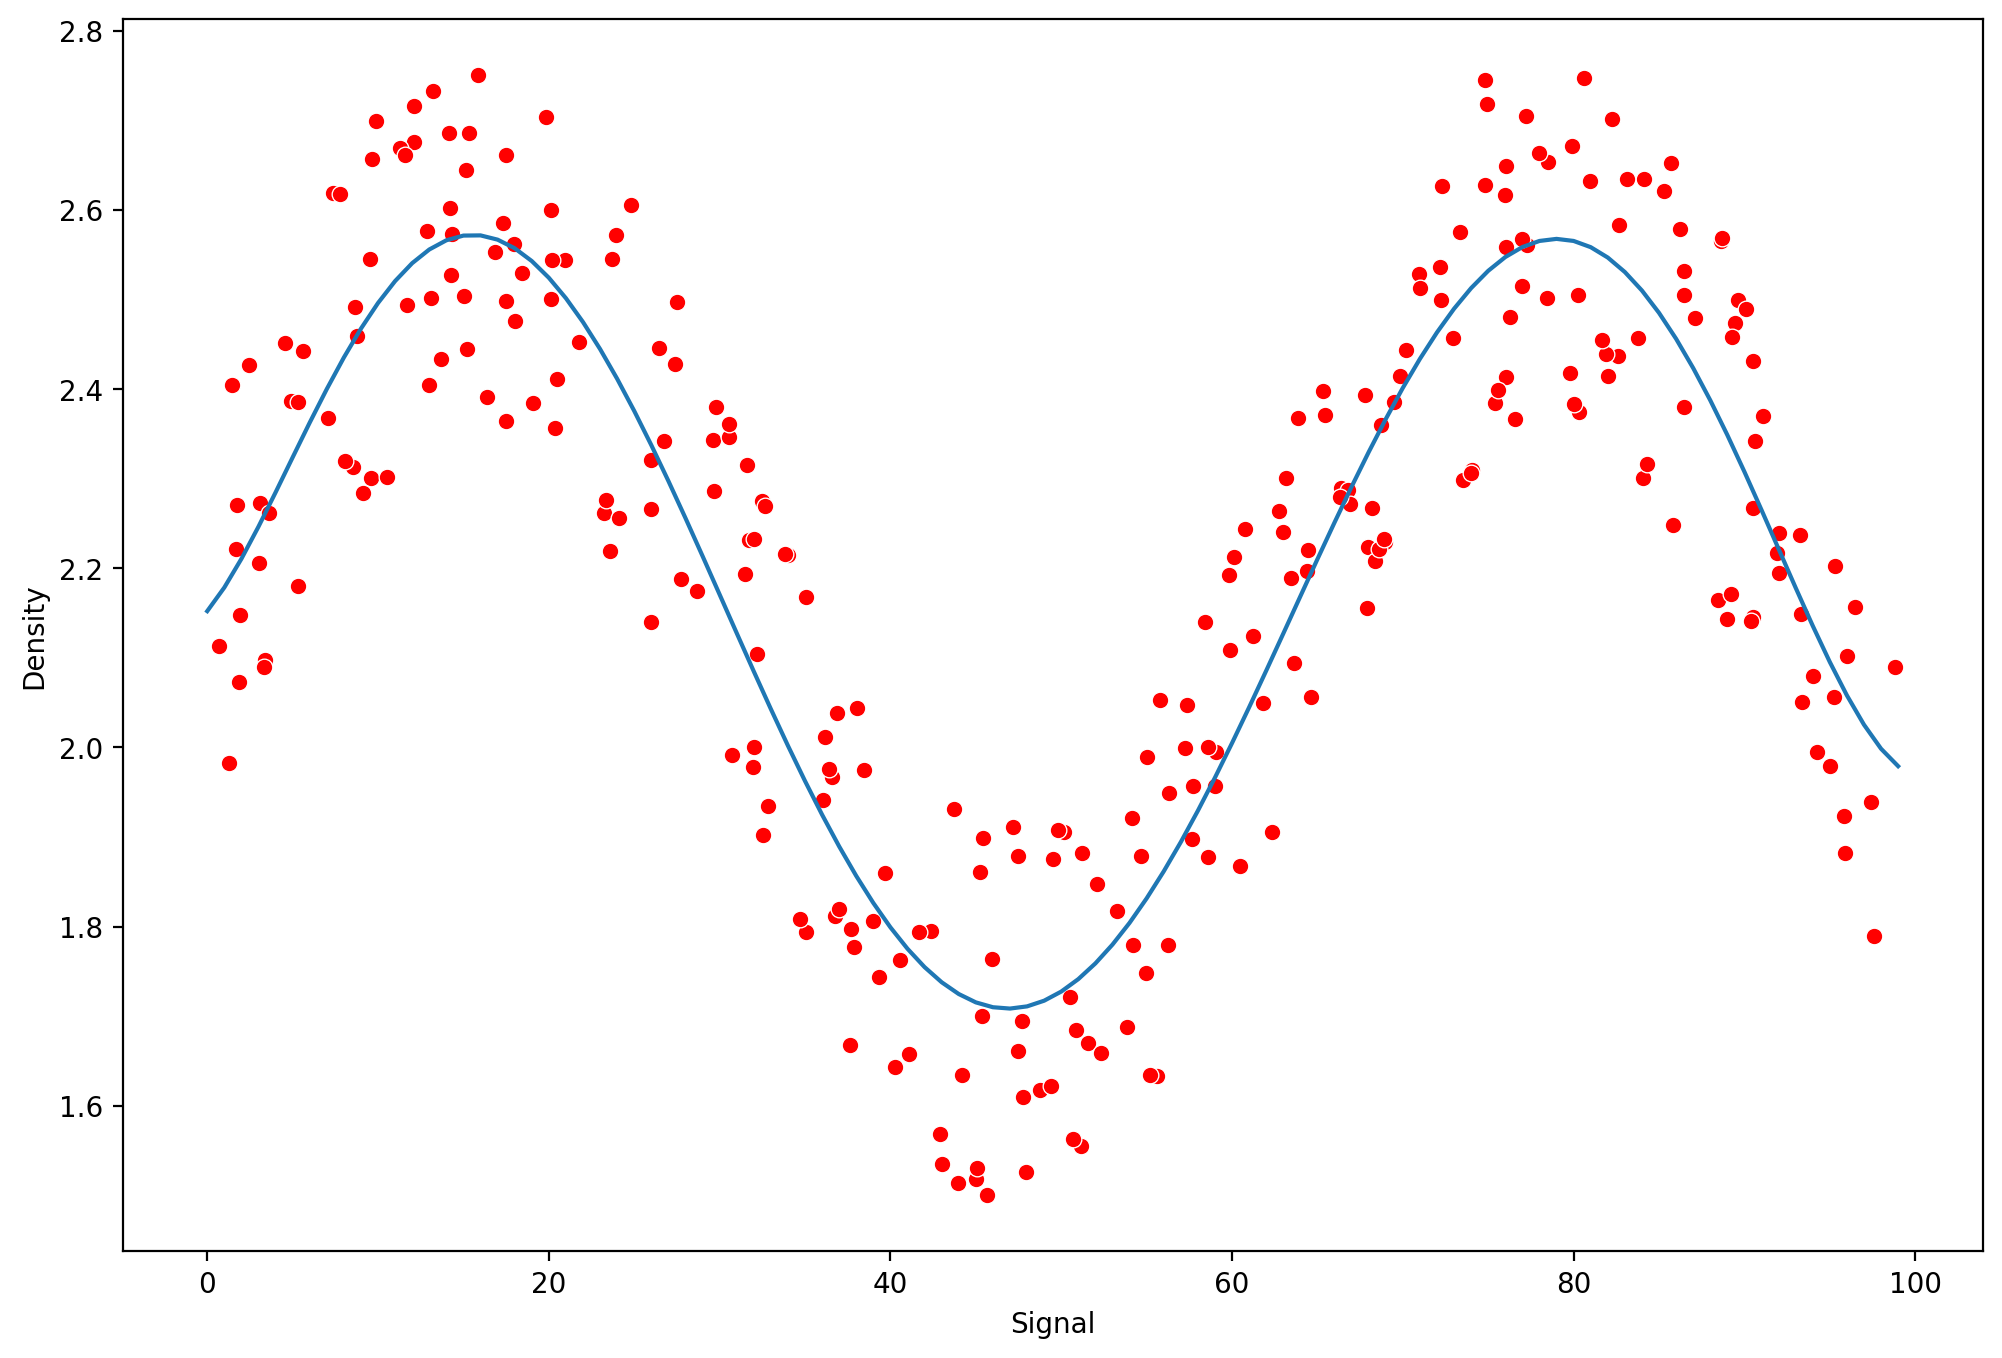

In [111]:
pipe = make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test) #creates polynomial feature set off X_train and trains it with linear regression

# could potentially run gridsearch to find best degree for fitting model however must notice that RMSE would be reduced
#so maybe not

## Random Forest Advanced Regression model.

In [112]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672


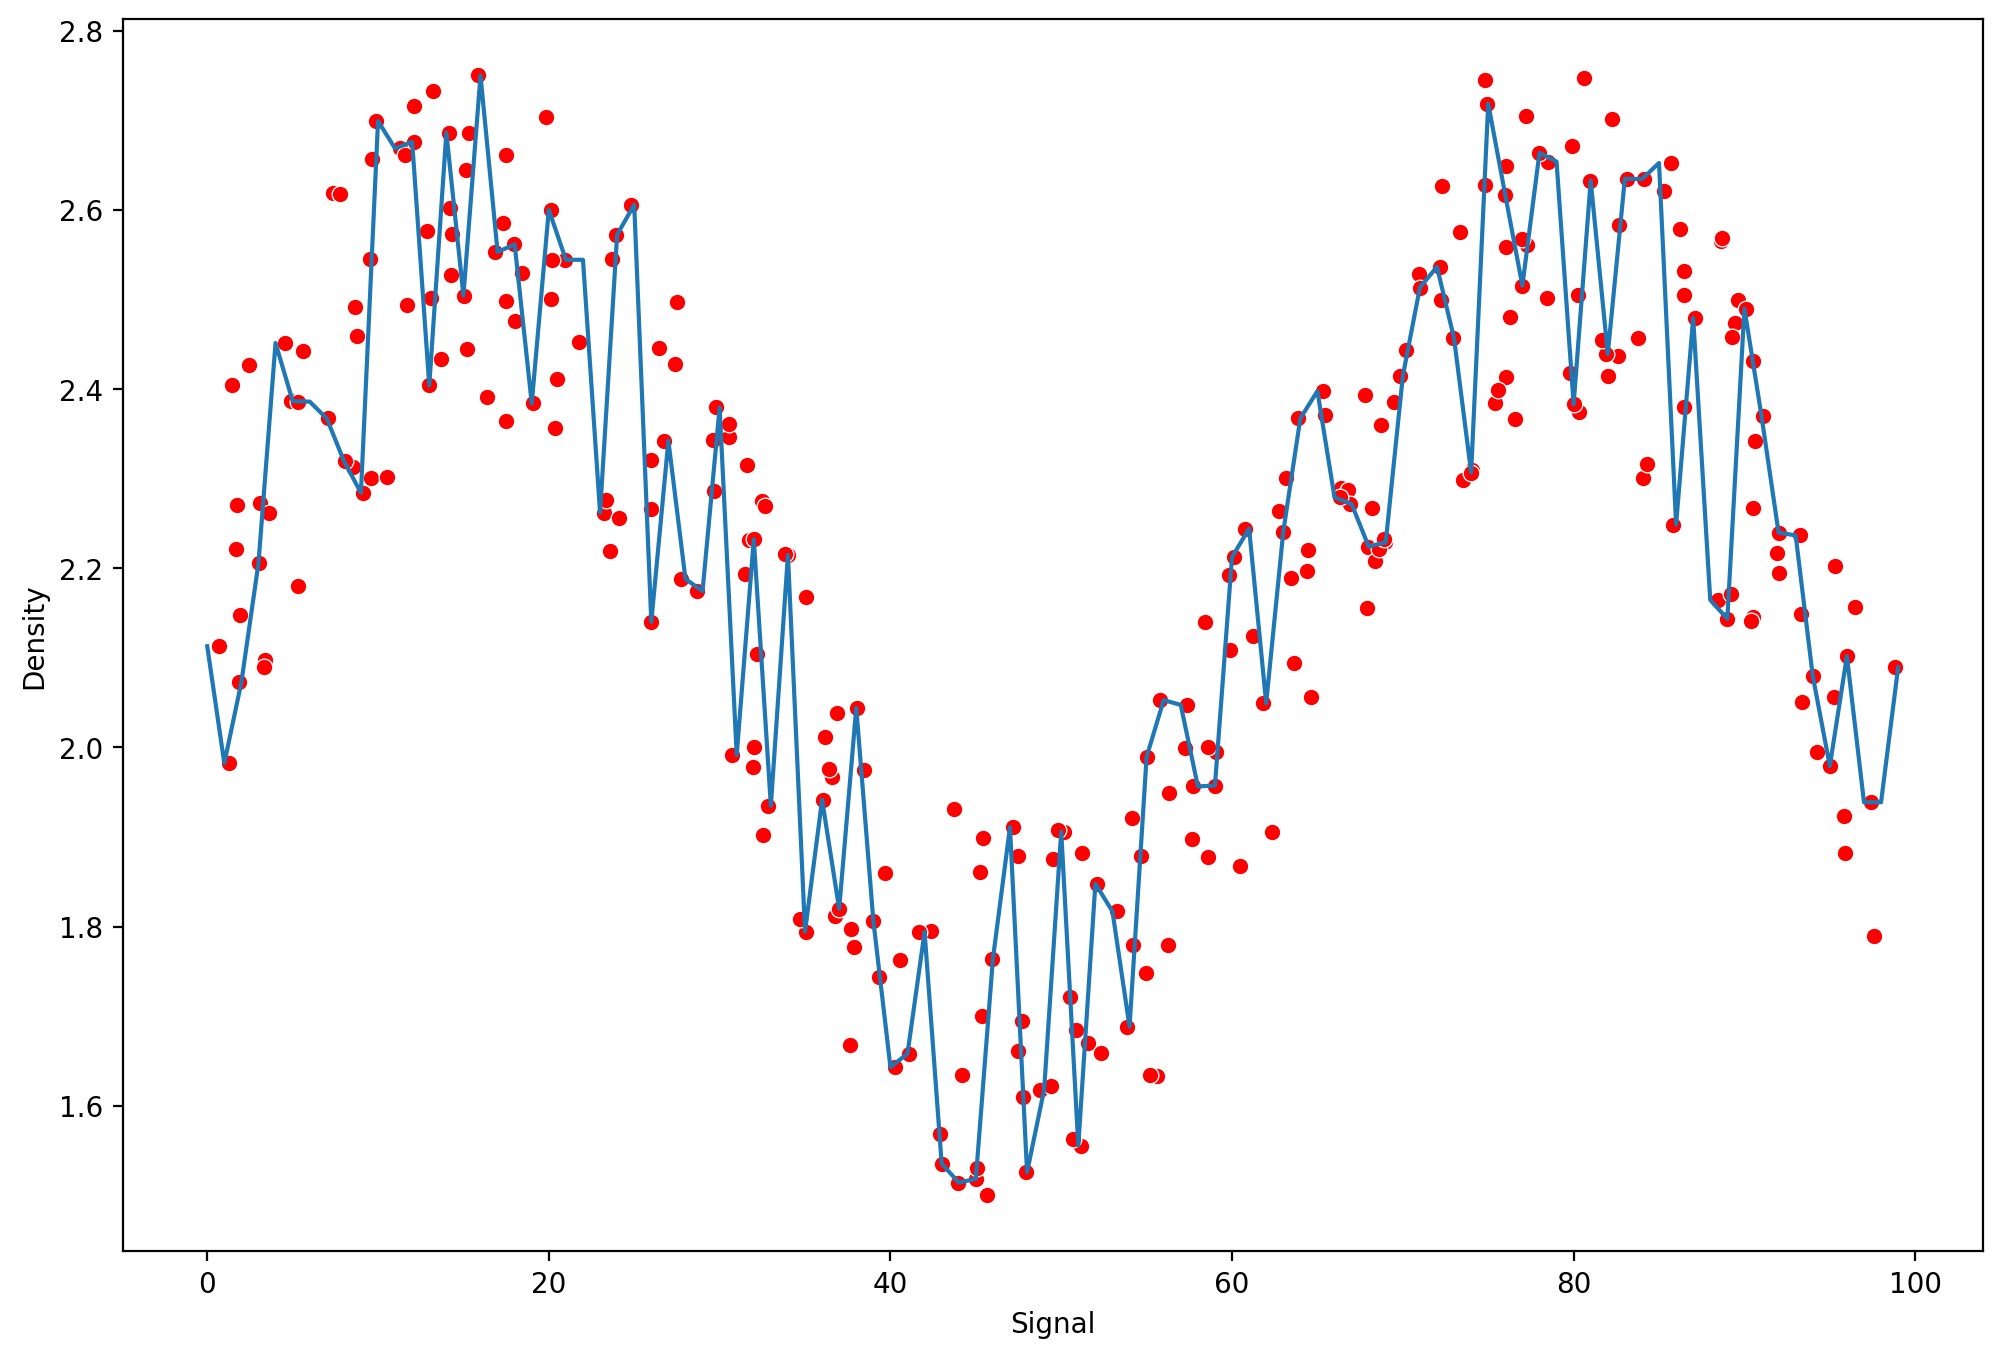

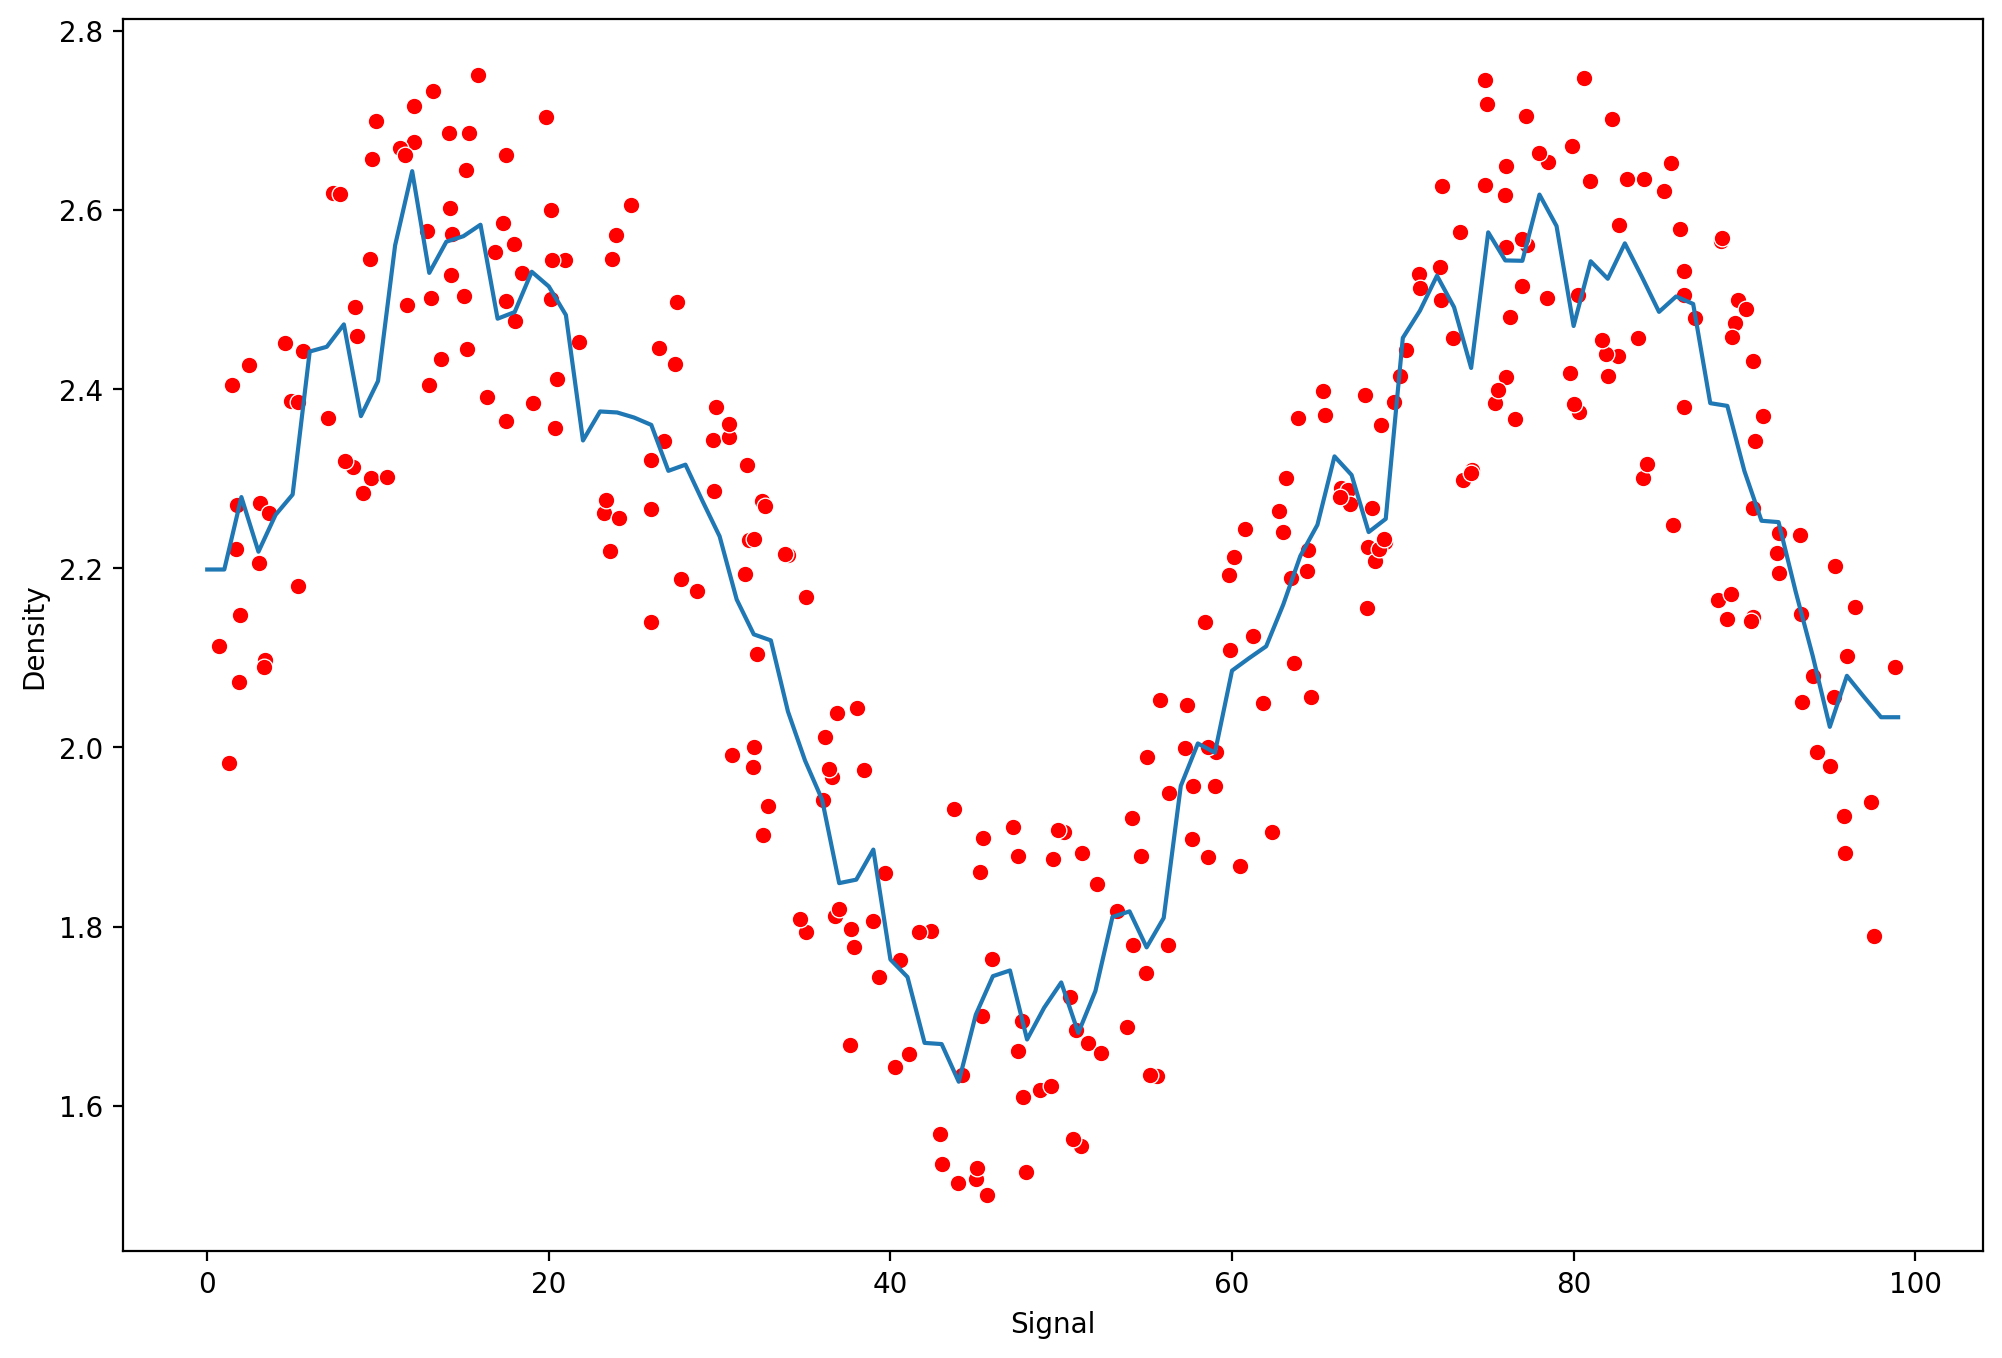

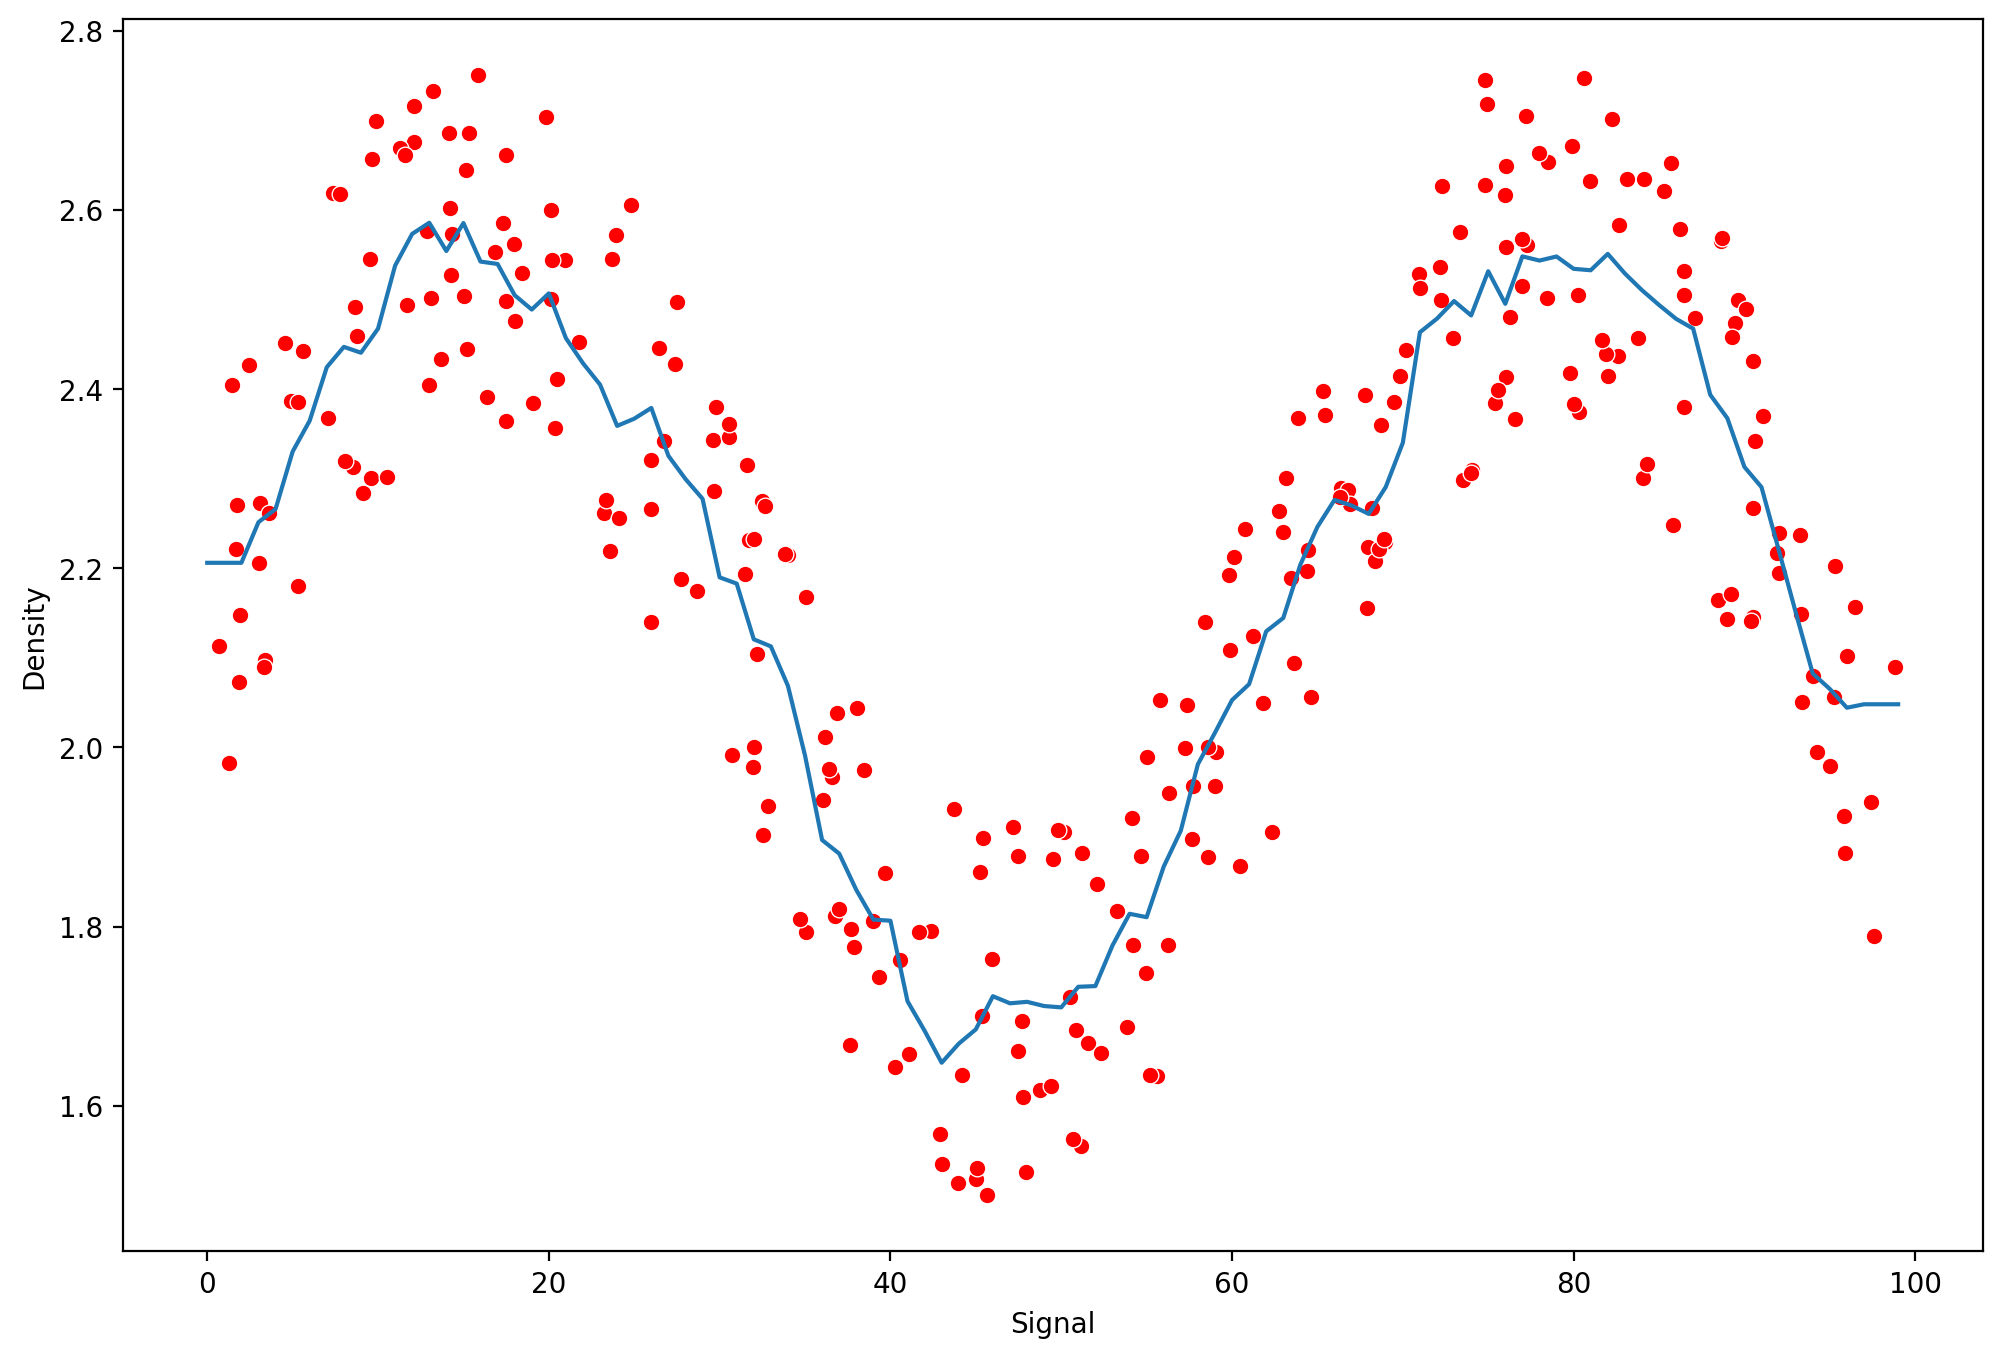

In [113]:
k_val = [1,5,10]

for n in k_val:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [114]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


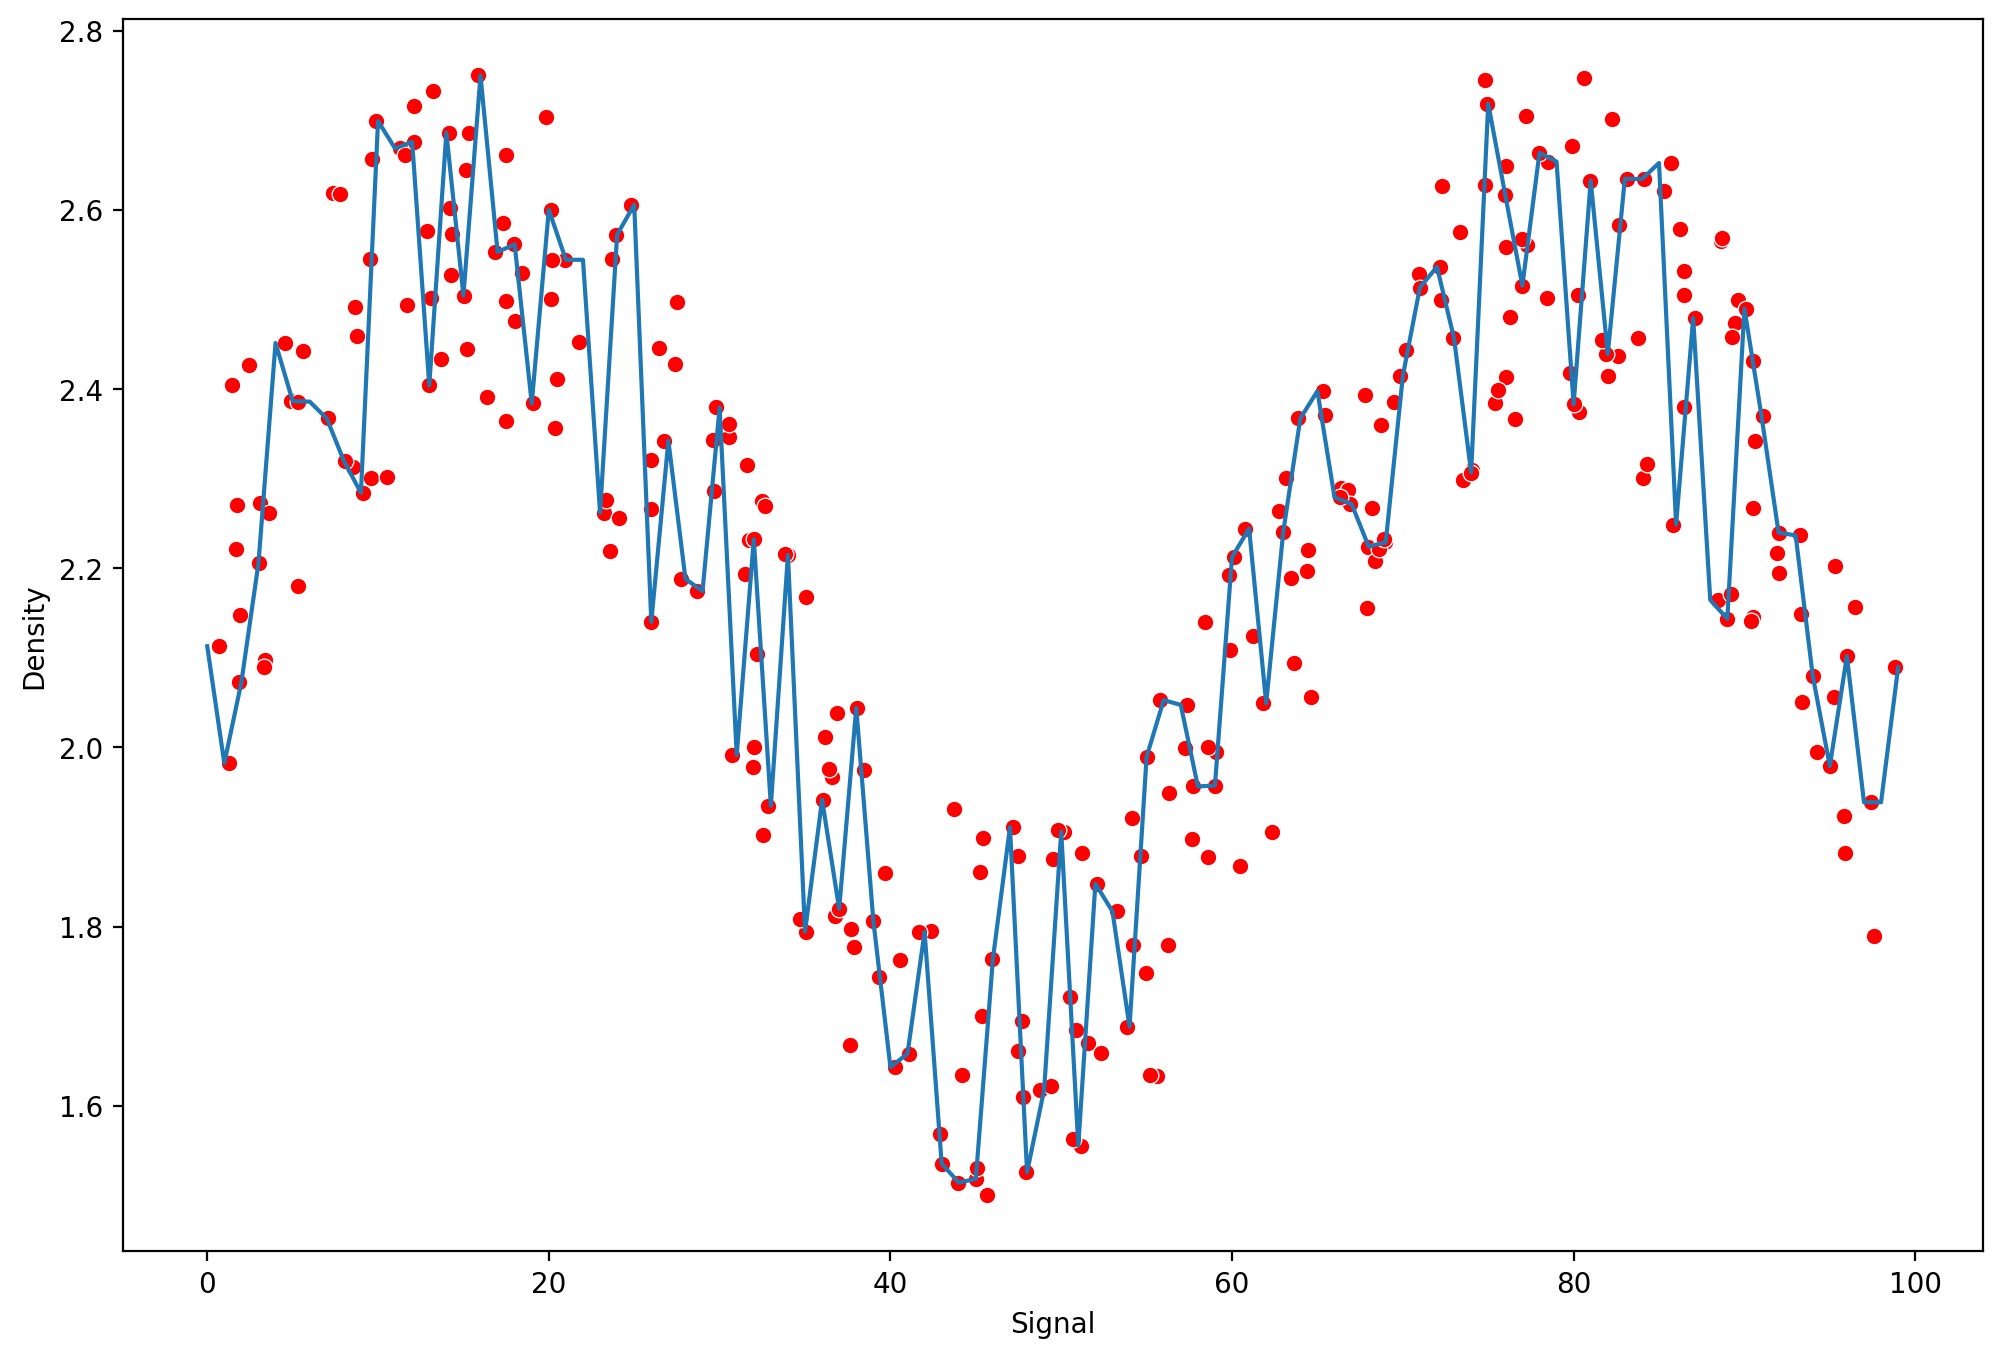

In [115]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [116]:
#always run gridsearch for SVR.
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [117]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}


grid = GridSearchCV(svr, param_grid)

RMSE: 0.12646999302046696
MAE: 0.10854210121348368


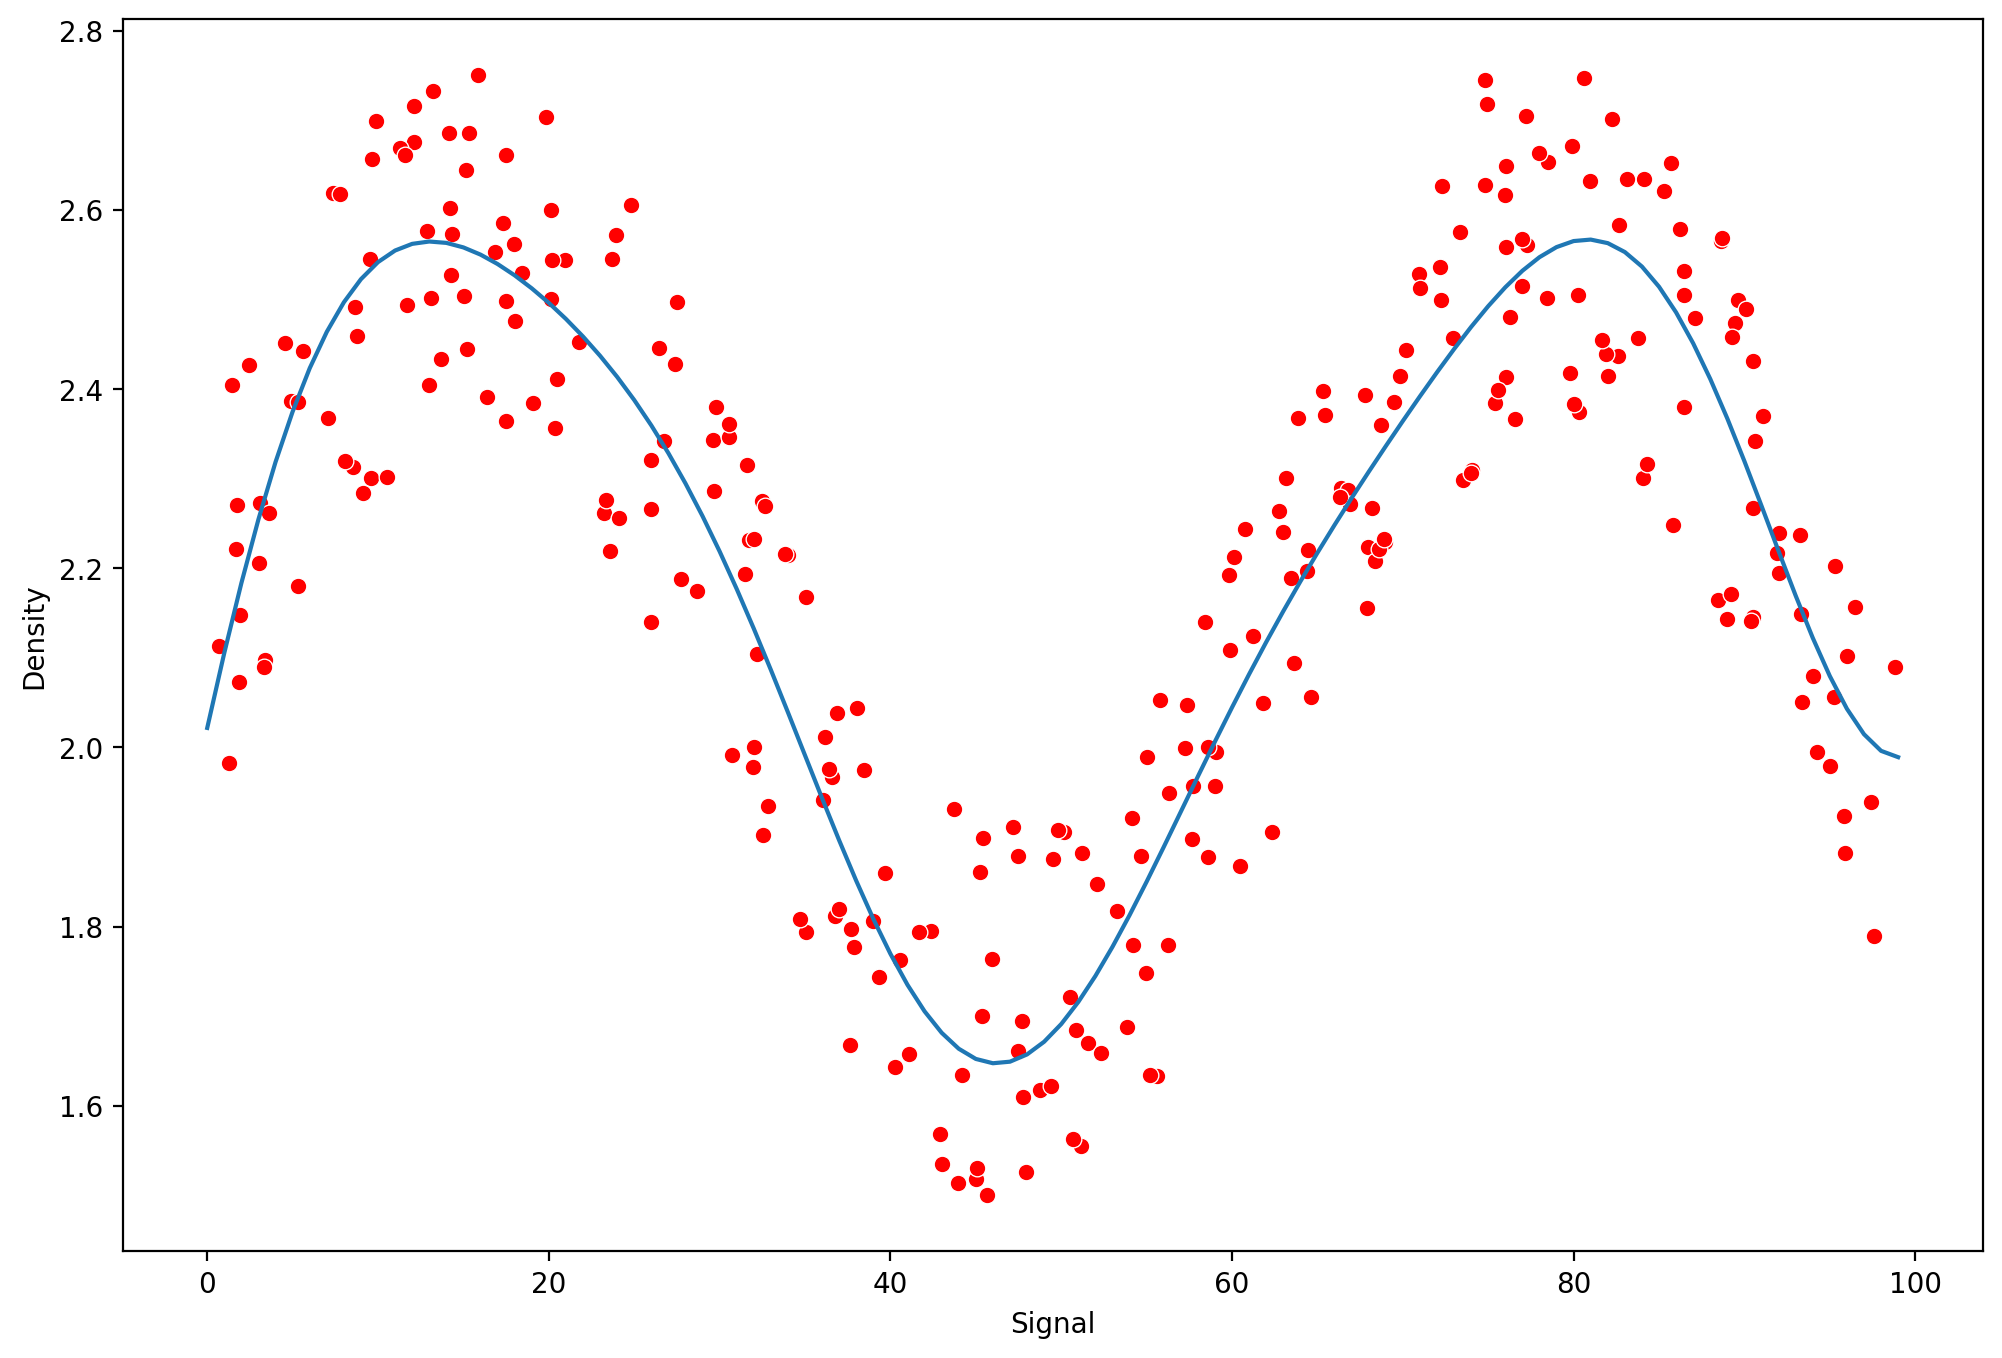

In [118]:

run_model(grid,X_train,y_train,X_test,y_test)

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.1357945097316637
MAE: 0.10853854538496453


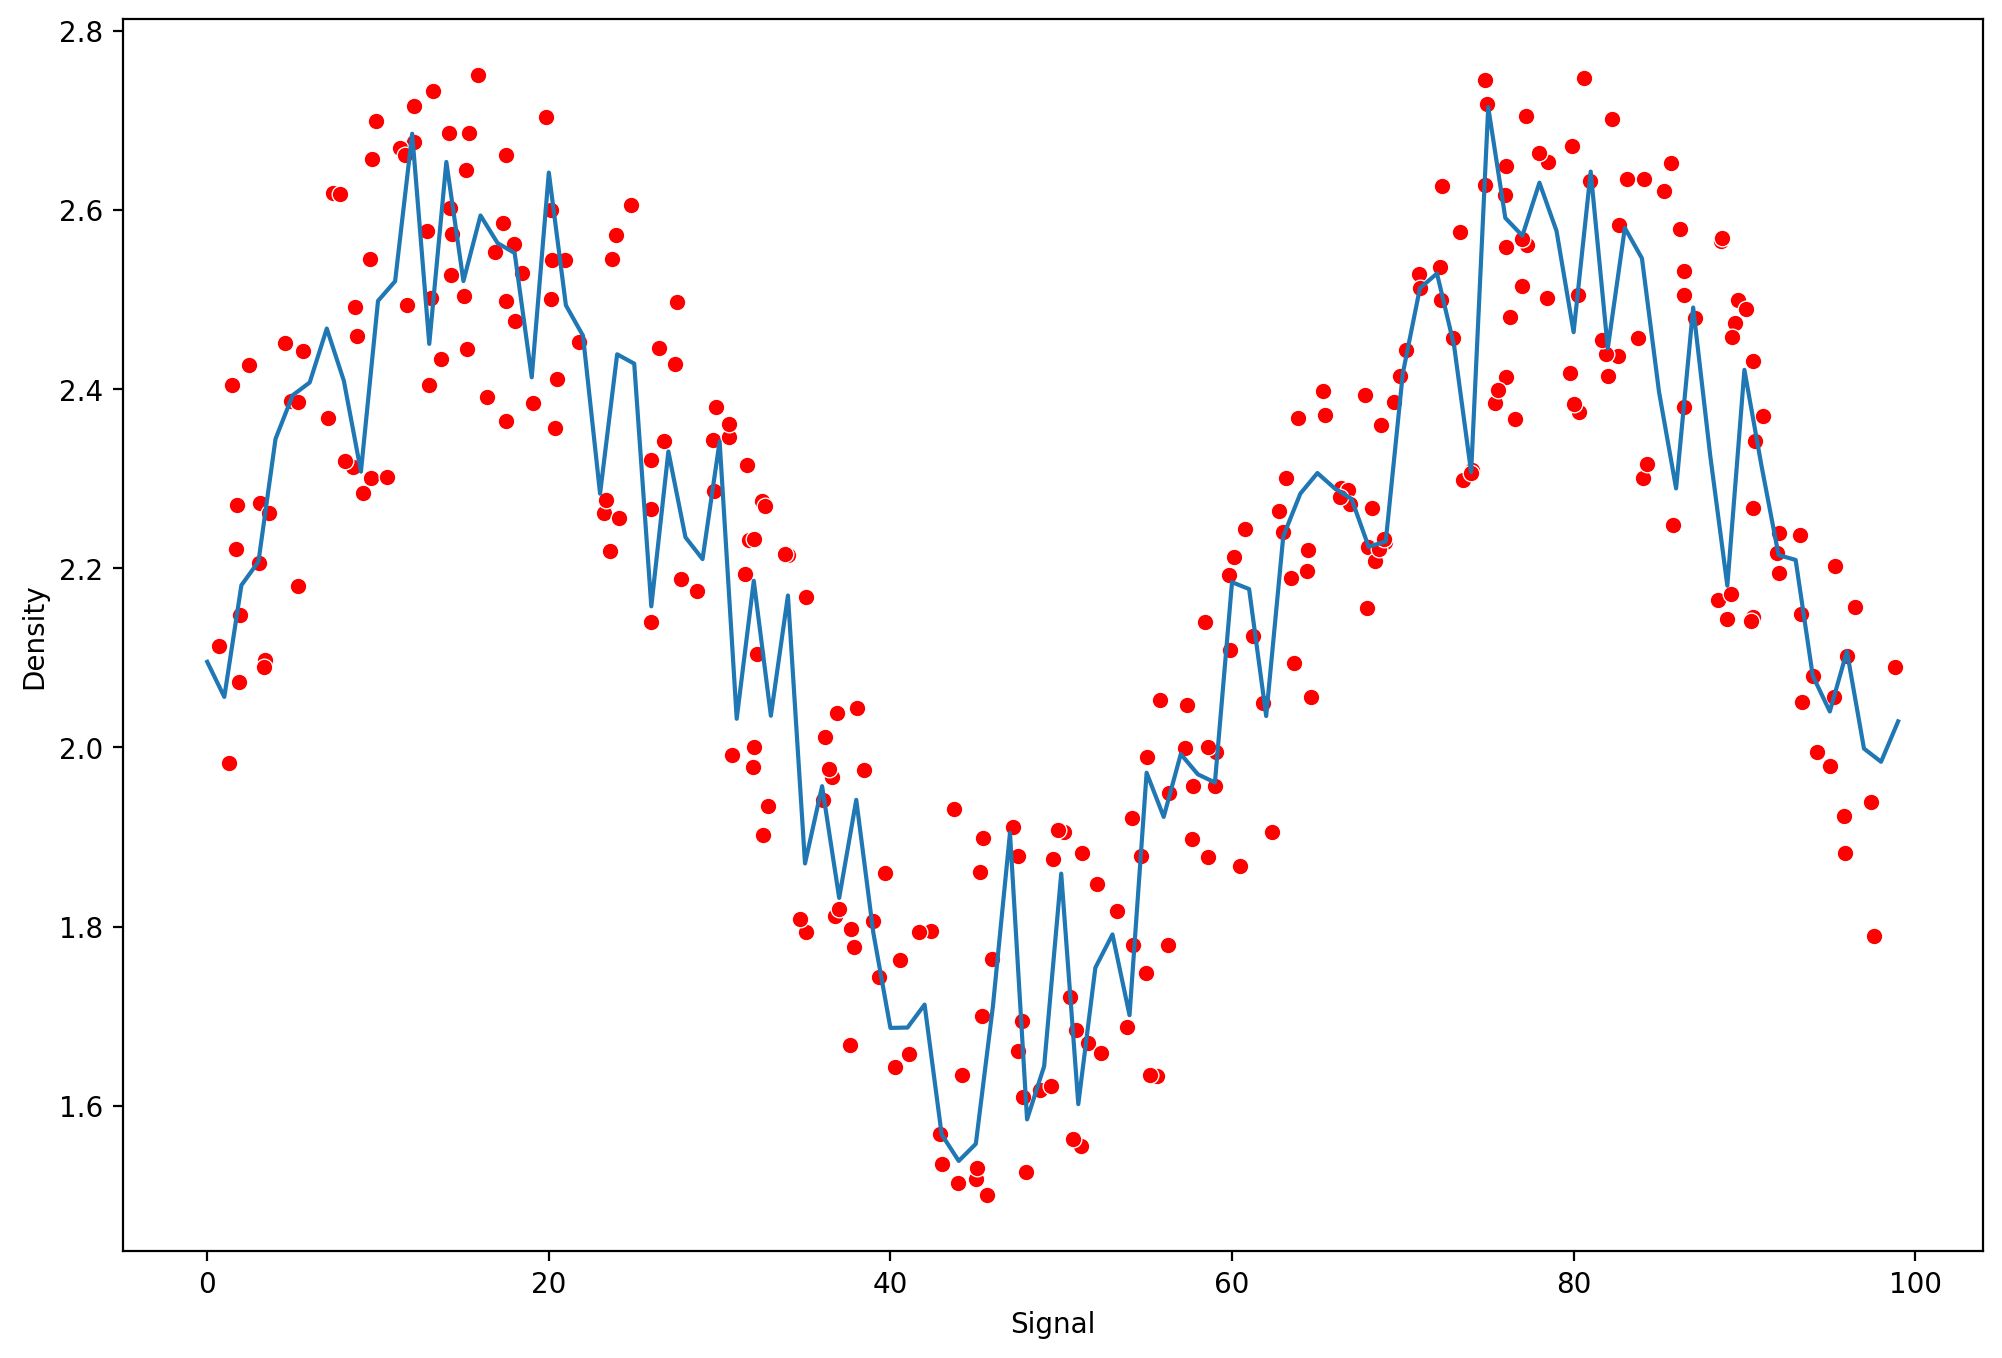

In [121]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [122]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


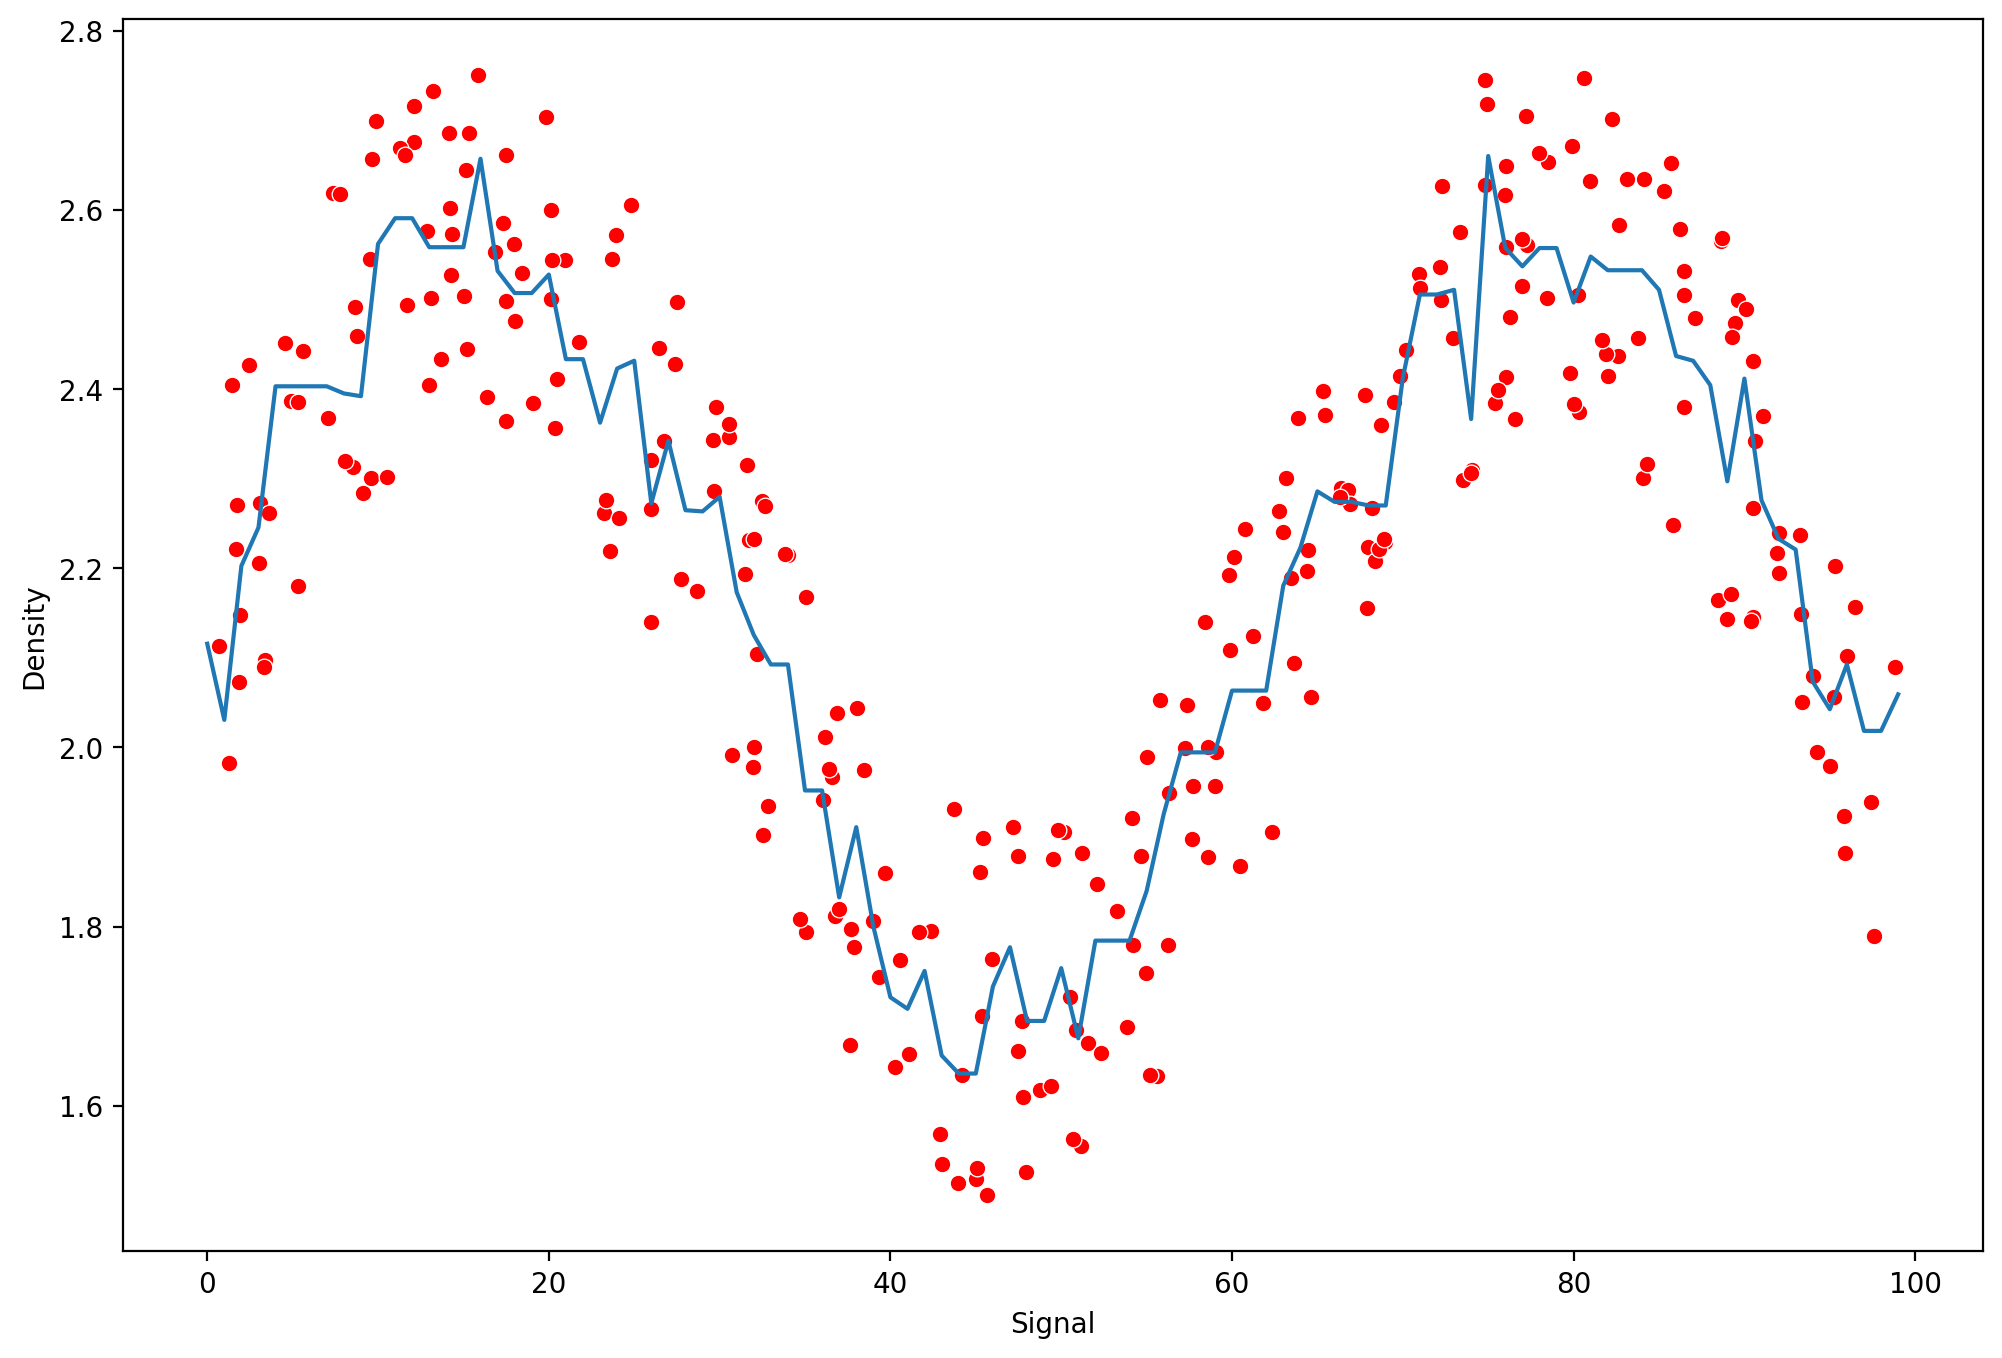

In [123]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE: 0.13730449380370188
MAE: 0.11801215660893856


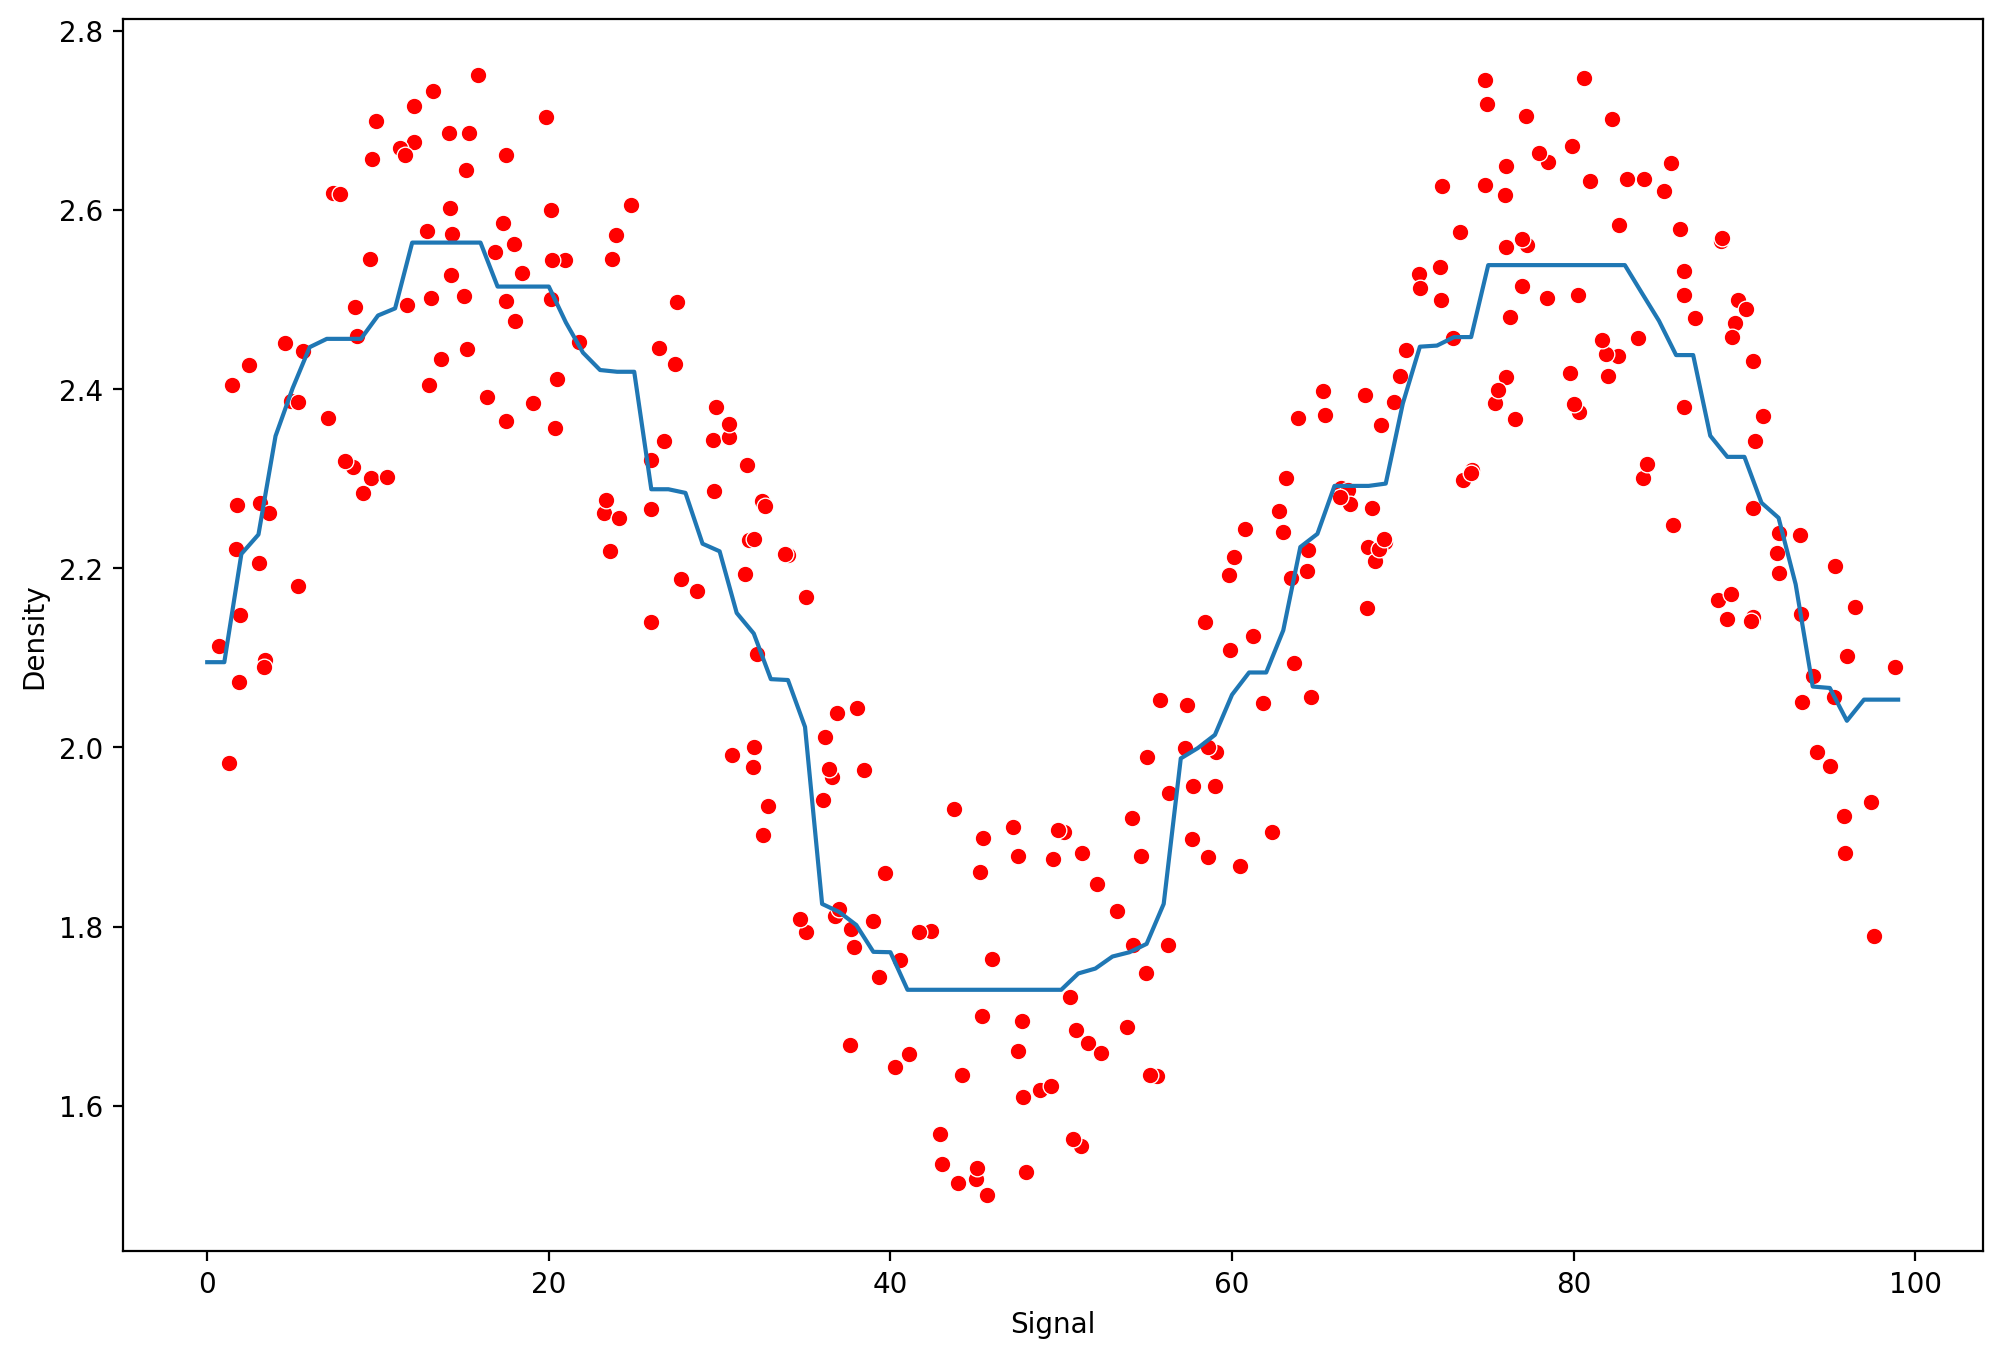

In [124]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [125]:
#various models are able to fit to the curve but some have more noise than others and thus less bias. 